## Gerçek / Sahte İş İlanı Tahmini 👩‍💻

**Veri Seti Hakkında**


 Sahte İş Tanımı Tahmini

Bu veri kümesi, yaklaşık 800'ü sahte olan 18 bin iş tanımı içerir. Veri, işler hakkında hem metinsel bilgilerden hem de meta bilgilerden oluşur. Veri kümesi, sahte olan iş tanımlarını öğrenebilen sınıflandırma modelleri oluşturmak için kullanılabilir.

🔗 **Görev**

 Elimizdeki veri seti üzerinden minimum hata ile iş ilanının gerçek mi sahte mi olduğunu tahmin eden bir makine öğrenmesi modeli geliştireceğiz.


**1. Değişkenler**

 *  **job_id:** İş tanımı için benzersiz bir kimlik
 *  **title:** İş unvanı
 * **location**: İşin konumu
 * **department:** İşin ait olduğu departman
 * **salary_range:** Maaş aralığı
 * **company_profile** Şirket profili hakkında bilgi
 * **description:** İş tanımı metni
 * **requirements:** İş için gerekli nitelikler
 * **benefits:** İşin sunduğu avantajlar
 * **telecommuting:** Uzaktan çalışma seçeneği
 * **has_company_logo:** Şirket logosunun olup olmadığı
 * **has_questions:** İş tanımında soruların olup olmadığı Var
 * **employment_type:** Çalışma türü
 * **required_experience:** Gereken deneyim seviyesi
 * **required_education:**Gereken eğitim seviyesi
 * **industry:**İşin ait olduğu sektör
 * **function:** İşin ait olduğu fonksiyon
 * **fraudulent:** İş tanımının sahte olup olmadığı




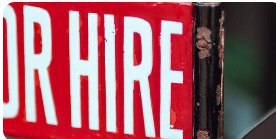

**Veri Setimiz:**

https://www.kaggle.com/code/busraalpay/jobscout
[50.06 MB]

**Veri Hakkında:**
Bu dosya iş tanımlarının veri kümesini ve meta bilgilerini içerir. Bu tanımların küçük bir kısmı sahte veya dolandırıcılıktır ve **"fraudulent"** sütunuyla tanımlanabilir.

**Gerekli kütüphaneleri içe aktarma**

📌 Her zamanki gibi gerekli kütüphaneleri içe aktarmakla başlayacağız.



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV




### Verileri Setini Yükleme ve Okuma

📌Veri setimizi yükleyip  .csv dosyasını okuyalım.




In [1]:
from google.colab import files
uploaded = files.upload()




Saving fake_job_postings.csv to fake_job_postings.csv


In [4]:
# Dosya adını ve yolunu belirtin
df = pd.read_csv('fake_job_postings.csv')

# İlk birkaç satırı görüntüleyin
print(df.head())
print(df.shape)
print(df.info())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

# Keşifsel Veri Analizi (EDA - Exploratory Data Analysis)🪂

1. Veri Yükleme ve İlk İnceleme
2. Kategorik Değişken Analizi (Analysis of Categorical Variables)
3. Sayısal Değişken Analizi (Analysis of Numerical Variables)
4. Kardinal Değişken Analizi (Analysis of Cardinal Variables)
5. Hedef Değişken Analizi (Analysis of Target Variable)














   





**1. Veri Yükleme ve İlk İnceleme**









In [32]:

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [33]:
#Train ve Test veri setlerini okutup birleştiriniz. Birleştirdiğiniz veri üzerinden ilerliyoruz.
# train ve test setlerinin bir araya getirilmesi.
train = pd.read_csv("fake_job_postings.csv")
test = pd.read_csv("fake_job_postings.csv")


# Veri setlerini birleştirme
df = pd.concat([train, test], ignore_index=True)

# İndeksi sıfırlama (reset_index() fonksiyonunu kullanarak eski indeksi kaldırma)
df = df.reset_index(drop=True)

# Verinin genel durumunu kontrol etme
def check_df(dataframe):
    """ Verinin genel durumunu kontrol eden fonksiyon """
    print("DataFrame Shape: ", dataframe.shape ,"\n")
    print("DataFrame Info:")
    print(dataframe.info(),"\n")
    print("First 5 rows:")
    print(dataframe.head(),"\n")
    print("Descriptive Statistics:")
    print(dataframe.describe(include='all'),"\n")
    print("Missing Value")
    print(dataframe.isnull().sum(),"\n")



check_df(df)



DataFrame Shape:  (35760, 18) 

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35760 entries, 0 to 35759
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               35760 non-null  int64 
 1   title                35760 non-null  object
 2   location             35068 non-null  object
 3   department           12666 non-null  object
 4   salary_range         5736 non-null   object
 5   company_profile      29144 non-null  object
 6   description          35758 non-null  object
 7   requirements         30368 non-null  object
 8   benefits             21336 non-null  object
 9   telecommuting        35760 non-null  int64 
 10  has_company_logo     35760 non-null  int64 
 11  has_questions        35760 non-null  int64 
 12  employment_type      28818 non-null  object
 13  required_experience  21660 non-null  object
 14  required_education   19550 non-null  object
 15  indus

###💡 Missing Value Analizi

Bu analiz, veri setindeki her sütunun eksik (boş) değer sayısını göstermektedir. Eksik değerler, veriyi kullanmadan önce hangi sütunlarda ne kadar eksik bilgi olduğunu anlamamıza yardımcı olur. İşte eksik veri durumunun analizi:

1. job_id (0 eksik):
   - Hiç eksik veri yok. Her iş ilanı için benzersiz bir ID mevcut.

2. title (0 eksik):
   - Tüm iş ilanlarının bir başlığı var. Eksik veri bulunmuyor.

3. location (692 eksik):
   - %3-4 oranında iş ilanında yer bilgisi eksik. Bu, lokasyon bazlı analizler için bir eksiklik oluşturabilir.

4. department (23,094 eksik): ❗
   - %77 oranında iş ilanında departman bilgisi eksik. Bu sütun, analiz için yeterli bilgi sunmayabilir.

5. salary_range (30,024 eksik): ❗
   - %83 oranında iş ilanında maaş bilgisi eksik. Bu, önemli bir değişken eksikliğine işaret ediyor.

6. company_profile (6,616 eksik): ❗
   - %18 oranında iş ilanında şirket profili eksik. Şirket hakkında bilgi olmaması güvenlik veya sahtecilik analizlerinde kritik olabilir.

7. description (2 eksik):
   - Sadece 2 iş ilanında açıklama eksik. Bu küçük bir sorun olarak değerlendirilebilir.

8. requirements (5,392 eksik):
   - %14 oranında iş ilanında gereksinim bilgisi eksik. Bu veri, iş tanımları için önemlidir.

9. benefits (14,424 eksik): ❗
   - %40'tan fazla iş ilanında fayda bilgisi eksik. Çalışanlara sağlanan ek olanaklar hakkında bilgi sağlayacak önemli bir veri noktasıdır.

10. telecommuting (0 eksik):
    - Tüm ilanlarda uzaktan çalışma bilgisi mevcut.

11. has_company_logo (0 eksik):
    - Tüm ilanlarda şirket logosu olup olmadığı bilgisi mevcut.

12. has_questions (0 eksik):
    - Tüm ilanlar, işe alım sürecinde ek sorular olup olmadığını belirtmiş.

13. employment_type (6,942 eksik):
    - %20 oranında iş ilanında istihdam türü (tam zamanlı, yarı zamanlı vb.) belirtilmemiş.

14. required_experience (14,100 eksik): ❗
    - %39 oranında iş ilanında deneyim bilgisi eksik. Bu, önemli bir eksik veri olup, pozisyonlar için deneyim analizini etkiler.

15. required_education (16,210 eksik): ❗
    - %45 oranında iş ilanında eğitim gereksinimi belirtilmemiş. Bu, eğitim seviyesine göre analiz yapacaklar için önemli bir eksikliktir.

16. industry (9,806 eksik):
    - %27 oranında iş ilanında sektör bilgisi eksik.

17. function (12,910 eksik):
    - %36 oranında iş ilanında iş fonksiyonu bilgisi eksik.

18. fraudulent (0 eksik):
    - Tüm ilanlar sahtecilik durumu (fraudulent) ile ilgili bilgi içeriyor.

### Genel Analiz
- Kritik Eksiklikler: "department", "salary_range", "required_experience", "required_education" ve "function" sütunlarında ciddi eksiklikler mevcut.
- Eksik Olmayan Sütunlar: "job_id", "title", "telecommuting", "has_company_logo", "has_questions" ve "fraudulent" sütunlarında eksik veri bulunmuyor ve bu sütunlar güvenilir olarak kullanılabilir.

🔅🔅**Eksik Değerlerin Hedef Değişken Üzerindeki Etkisi:**

Eksik değerlerin hedef değişken olan `fraudulent`  üzerindeki etkilerini gözlemleyelim. Bu değerlendirme sayesinde, eksik değerlerin (boş) değişkenlerin analiz sonuçları üzerindeki etkisini belirleyerek, bu değerlerle nasıl başa çıkmamız gerektiğine karar vereceğiz. Boş değerler için uygun bir işlem seçmek, örneğin değerleri doldurmak veya gözlemleri silmek gibi, veri setinizin doğruluğunu ve modelinizin performansını artırmak adına kritik bir adımdır.




In [34]:
# Her bir sütundaki eksik değerlerin bayrağını oluşturma (NaN olanlar için 1, olmayanlar için 0)
missing_flags = df.isnull().astype(int)

# Sonuçları yazdırma
for column in missing_flags.columns:
    if missing_flags[column].sum() > 0:  # Sadece eksik değer olan sütunları analiz edelim
        # Eksik değer olanların fraudulent ortalaması ve sayısı
        fraudulent_when_missing = df.loc[missing_flags[column] == 1, 'fraudulent'].sum()
        count_missing = missing_flags[column].sum()

        # Eksik değer olmayanların fraudulent ortalaması ve sayısı
        fraudulent_when_not_missing = df.loc[missing_flags[column] == 0, 'fraudulent'].sum()
        count_not_missing = (missing_flags[column] == 0).sum()

        # Sonuçları yazdırma
        print("____________________________________________________________________________________ ")
        print(f"{column}")
        print("................ ")
        print(f"• Eksik Değerler:")
        print(f"    • Fraudulent (Sahte) Sayısı: {fraudulent_when_missing}")
        print(f"    • Non-Fraudulent (Gerçek) Sayısı: {count_missing - fraudulent_when_missing}")
        print(f"• Dolu Değerler:")
        print(f"    • Fraudulent (Sahte) Sayısı: {fraudulent_when_not_missing}")
        print(f"    • Non-Fraudulent (Gerçek) Sayısı: {count_not_missing - fraudulent_when_not_missing}")
        print()

____________________________________________________________________________________ 
location
................ 
• Eksik Değerler:
    • Fraudulent (Sahte) Sayısı: 38
    • Non-Fraudulent (Gerçek) Sayısı: 654
• Dolu Değerler:
    • Fraudulent (Sahte) Sayısı: 1694
    • Non-Fraudulent (Gerçek) Sayısı: 33374

____________________________________________________________________________________ 
department
................ 
• Eksik Değerler:
    • Fraudulent (Sahte) Sayısı: 1062
    • Non-Fraudulent (Gerçek) Sayısı: 22032
• Dolu Değerler:
    • Fraudulent (Sahte) Sayısı: 670
    • Non-Fraudulent (Gerçek) Sayısı: 11996

____________________________________________________________________________________ 
salary_range
................ 
• Eksik Değerler:
    • Fraudulent (Sahte) Sayısı: 1286
    • Non-Fraudulent (Gerçek) Sayısı: 28738
• Dolu Değerler:
    • Fraudulent (Sahte) Sayısı: 446
    • Non-Fraudulent (Gerçek) Sayısı: 5290

______________________________________________________________

🔅🔅 **Eksik Değerlerin `fraudulent` Oranı Üzerindeki Etkisi:**

Eksik değerlerin fraudulent oranı üzerindeki etkisini inceleyerek, sahte iş ilanlarının eksik değerlerden mi yoksa dolu değerlerden mi kaynaklandığını analiz edelim. Oranlar üzerinden yapacağımız bu analiz, sahte iş ilanlarının hangi veri eksikliklerinden veya tamamlanmış verilerden daha fazla etkilendiğini anlamamızı kolaylaştıracaktır.

In [35]:
# Her sütun için işlemleri yapma


for column in df.columns:
    if df[column].isnull().sum() > 0:  # Sadece eksik değer olan sütunları analiz edelim
        # Eksik ve dolu değerlerin fraudulent sayıları
        fraudulent_when_missing = df[df[column].isnull()]['fraudulent'].sum()
        fraudulent_when_not_missing = df[df[column].notnull()]['fraudulent'].sum()

        # Eksik ve dolu değerlerin toplam sayıları
        total_missing = df[column].isnull().sum()
        total_not_missing = df[column].notnull().sum()

        # Fraudulent oranını hesaplama
        fraudulent_ratio = fraudulent_when_missing / (fraudulent_when_missing + fraudulent_when_not_missing) if (fraudulent_when_missing + fraudulent_when_not_missing) > 0 else 0

        # Sonuçları formatlı şekilde yazdırma
        print(f"{column} \n"
              f"• Eksik Değerde Fraudulent (Sahte) Sayısı: {fraudulent_when_missing}\n"
              f"• Dolu Değerlerde Fraudulent (Sahte) Sayısı: {fraudulent_when_not_missing}\n"
              f"• Fraudulent Oranı: {fraudulent_ratio:.2%}\n")

location 
• Eksik Değerde Fraudulent (Sahte) Sayısı: 38
• Dolu Değerlerde Fraudulent (Sahte) Sayısı: 1694
• Fraudulent Oranı: 2.19%

department 
• Eksik Değerde Fraudulent (Sahte) Sayısı: 1062
• Dolu Değerlerde Fraudulent (Sahte) Sayısı: 670
• Fraudulent Oranı: 61.32%

salary_range 
• Eksik Değerde Fraudulent (Sahte) Sayısı: 1286
• Dolu Değerlerde Fraudulent (Sahte) Sayısı: 446
• Fraudulent Oranı: 74.25%

company_profile 
• Eksik Değerde Fraudulent (Sahte) Sayısı: 1174
• Dolu Değerlerde Fraudulent (Sahte) Sayısı: 558
• Fraudulent Oranı: 67.78%

description 
• Eksik Değerde Fraudulent (Sahte) Sayısı: 2
• Dolu Değerlerde Fraudulent (Sahte) Sayısı: 1730
• Fraudulent Oranı: 0.12%

requirements 
• Eksik Değerde Fraudulent (Sahte) Sayısı: 308
• Dolu Değerlerde Fraudulent (Sahte) Sayısı: 1424
• Fraudulent Oranı: 17.78%

benefits 
• Eksik Değerde Fraudulent (Sahte) Sayısı: 728
• Dolu Değerlerde Fraudulent (Sahte) Sayısı: 1004
• Fraudulent Oranı: 42.03%

employment_type 
• Eksik Değerde Fraudul

### Eksik Değerlerin fraudulent Oranının Analizi

1. Location: Fraudulent Oranı: %2.19  
   - Yorum: Eksik değerlerin sahte ilanlarla ilişkisi düşüktür.

2. Department: Fraudulent Oranı: %61.32 ❗  
   - Yorum: Eksik değerler sahte ilanların büyük kısmını oluşturmaktadır.

3. Salary Range: Fraudulent Oranı: %74.25 ❗  
   - Yorum: Eksik değerler sahte ilanların büyük kısmını oluşturmaktadır.

4. Company Profile: Fraudulent Oranı: %67.78 ❗  
   - Yorum: Eksik değerler sahte ilanların önemli bir kısmını oluşturmaktadır.

5. Description: Fraudulent Oranı: %0.12  
   - Yorum: Eksik değerlerin sahte ilanlarla ilişkisi neredeyse yoktur.

6. Requirements: Fraudulent Oranı: %17.78  
   - Yorum: Eksik değerlerin sahte ilanlarla ilişkisi düşüktür.

7. Benefits: Fraudulent Oranı: %42.03 ❗  
   - Yorum: Eksik değerler sahte ilanlarla orta derecede ilişkilidir.

8. Employment Type: Fraudulent Oranı: %27.83  
   - Yorum: Eksik değerlerin sahte ilanlarla ilişkisi orta seviyededir.

9. Required Experience: Fraudulent Oranı: %50.23 ❗  
   - Yorum: Eksik değerler sahte ilanlarla dengeli bir ilişkidedir.

10. Required Education: Fraudulent Oranı: %52.08 ❗  
    - Yorum: Eksik değerler sahte ilanlarla biraz daha yüksek bir ilişkidedir.

11. Industry: Fraudulent Oranı: %31.76  
    - Yorum: Eksik değerlerin sahte ilanlarla ilişkisi orta seviyededir.

12. Function: Fraudulent Oranı: %38.91  
    - Yorum: Eksik değerler sahte ilanlarla orta derecede ilişkilidir.

#🔅 **Veri Ön İşlem Adımları**

In [36]:
 #İşlem yapılacak sütunlar
columns_to_process = ['benefits', 'company_profile', 'department']


# Orijinal veri üzerinde eksik ve dolu değerleri 0 ve 1'e dönüştürme işlemi
for column in columns_to_process:
    if column in df.columns:
        df[column] = df[column].apply(lambda x: 0 if pd.isna(x) else 1)

# Dönüşümün başarılı olup olmadığını kontrol etmek için
print(df[columns_to_process].head())




   benefits  company_profile  department
0         0                1           1
1         1                1           1
2         0                1           0
3         1                1           1
4         1                1           0


In [37]:
# Boş değerleri kontrol et ve doldur
df['salary_range'].fillna('0-0', inplace=True)

# 'salary_range' sütunundaki maaş aralığını gruplara ayırma fonksiyonu
def categorize_salary(salary_range):
    try:
        # Maaş aralığını ayırıp üst limit olan değeri al
        lower, upper = salary_range.split('-')
        upper = float(upper)
        # Maaş aralığını gruplara ayır
        if upper < 30000:
            return 'Low'
        elif upper < 60000:
            return 'Medium'
        else:
            return 'High'
    except ValueError:
        return 'Unknown'  # Belirlenemeyen maaş aralıkları için

# 'salary_range' sütununu gruplara ayırarak 'salary_group' sütununu oluştur
df['salary_group'] = df['salary_range'].apply(categorize_salary)

# Groupby kullanarak aralık bazında toplama
grouped_df = df.groupby('salary_group').size().reset_index(name='count')

# İlk 10 satırı yazdırma
print(df[['salary_range', 'salary_group']].head(10))
print(grouped_df)


  salary_range salary_group
0          0-0          Low
1          0-0          Low
2          0-0          Low
3          0-0          Low
4          0-0          Low
5          0-0          Low
6  20000-28000          Low
7          0-0          Low
8          0-0          Low
9          0-0          Low
  salary_group  count
0         High   2556
1          Low  31602
2       Medium   1558
3      Unknown     44


🔅**Veri Ön İşlem Adımlarının Açıklaması:**

Veri setimdeki benefits, company_profile, ve department değişkenlerinin sahte oranları sırasıyla %42.03, %67.78 ve %61.32 olarak gözlemlenmiştir. Bu oranlar, boş değerlerin yüksek oranda sahte ilanlarla ilişkilendirilebileceğini göstermektedir. Ancak, bu değişkenlerin içeriği uzun ve karmaşık string ifadelerden oluştuğu için içerik analizi yapmak pratik olmayabilir.

Bu sebeple, bu değişkenlerdeki dolu değerleri 1, boş değerleri ise 0 olarak kodlayarak eksik değerleri doldurma işlemi gerçekleştirilmiştir. Bu yöntem, veri setindeki genel eğilimleri değerlendirmeyi kolaylaştırırken, uzun ve karmaşık içeriklerin analizine yönelik zaman ve kaynak tasarrufu sağlar.

Ek olarak, salary_range değişkeni için aralık bazında gruplama yaparak, verinin okunabilirliğini artırmayı hedefledim. Bu işlemle, salary_range verilerini daha anlamlı ve özetlenmiş aralıklara bölerek veri analizini daha verimli ve anlaşılır hale getirdim. pd.cut fonksiyonunu kullanarak, salary_upper değerlerine göre aralıkları belirledim ve bu aralıkları "Low", "Medium" ve "High" olarak sınıflandırdım. Son olarak, groupby işlemi ile her bir aralığın sayısını belirleyerek veri setinin daha iyi anlaşılmasına yardımcı oldum.





#📌 **Sayısal ,  Kategorik ve Kardinal Değişkenlerin Yakalanması**

Bu fonksiyon ile  veri setindeki kategorik ve sayısal değişkenleri tespit ederken ayrıca kategorik görünümlü sayısal değişkenleri ve kardinal (cardinal) değişkenleri de ayırır.





In [38]:
# Veri setlerini okuma
train = pd.read_csv("fake_job_postings.csv")
test = pd.read_csv("fake_job_postings.csv")

# Veri setlerini birleştirme
df = pd.concat([train, test], ignore_index=True)

# İndeks sıfırlama (df üzerinde doğrudan işlem yapılıyor)
df.reset_index(drop=True, inplace=True)

# df üzerinde işlemler yapabilirsiniz

In [39]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    DataFrame'deki kategorik, sayısal, kardinal ve sayısal görünümlü kategorik değişkenleri yakalar.
    :param dataframe: pd.DataFrame
    :param cat_th: int, kategorik olarak kabul edilecek eşik değer (default=10)
    :param car_th: int, kardinal olarak kabul edilecek eşik değer (default=20)
    :return: cat_cols, num_cols, cat_but_car, num_but_cat
    """
    # Kategorik değişkenler (genellikle object tipi olanlar)
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "object"]

    # Sayısal olup az sayıda benzersiz değeri olan (kategorik görünümlü) sayısal değişkenler
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtype in ['int64', 'float64'] and dataframe[col].nunique() < cat_th]

    # Çok fazla benzersiz değere sahip kategorik değişkenler (kardinal değişkenler)
    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtype == "object" and dataframe[col].nunique() > car_th]

    # Sayısal değişkenler (gerçekten sayısal olanlar, yani num_but_cat dışında kalanlar)
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype in ['int64', 'float64'] and col not in num_but_cat]

    # Kategorik değişkenlerden kardinal olanları çıkarıyoruz
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Bilgi çıktıları
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")  # Kategorik değişkenler
    print(f"num_cols: {len(num_cols)}")  # Sayısal değişkenler
    print(f"cat_but_car: {len(cat_but_car)}")  # Kardinal değişkenler
    print(f"num_but_cat: {len(num_but_cat)}")  # Sayısal görünümlü kategorik değişkenler

    return cat_cols, num_cols, cat_but_car, num_but_cat

# Değişkenlerin listesini almak için fonksiyonu çağırın
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

# Sonuçları yazdırma
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {num_cols}")
print(f"Cardinal columns: {cat_but_car}")
print(f"Numerical but categorical columns: {num_but_cat}")





Observations: 35760
Variables: 18
cat_cols: 3
num_cols: 1
cat_but_car: 10
num_but_cat: 4
Categorical columns: ['employment_type', 'required_experience', 'required_education']
Numerical columns: ['job_id']
Cardinal columns: ['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'function']
Numerical but categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']


#📌 **2- Kategorik Değişken Analizi (Analysis of Categorical Variables)**

                 employment_type  Ratio
employment_type                        
Full-time                  23240  64.99
Contract                    3048   8.52
Part-time                   1594   4.46
Temporary                    482   1.35
Other                        454   1.27


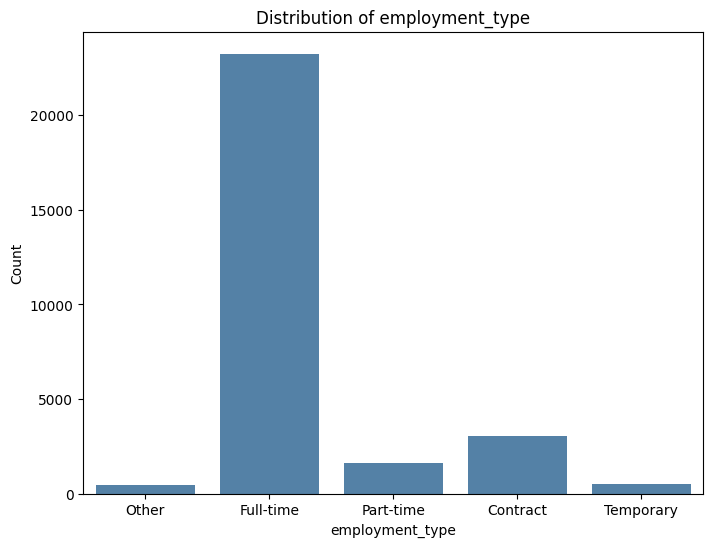

                     required_experience  Ratio
required_experience                            
Mid-Senior level                    7618  21.30
Entry level                         5394  15.08
Associate                           4594  12.85
Not Applicable                      2232   6.24
Director                             778   2.18
Internship                           762   2.13
Executive                            282   0.79


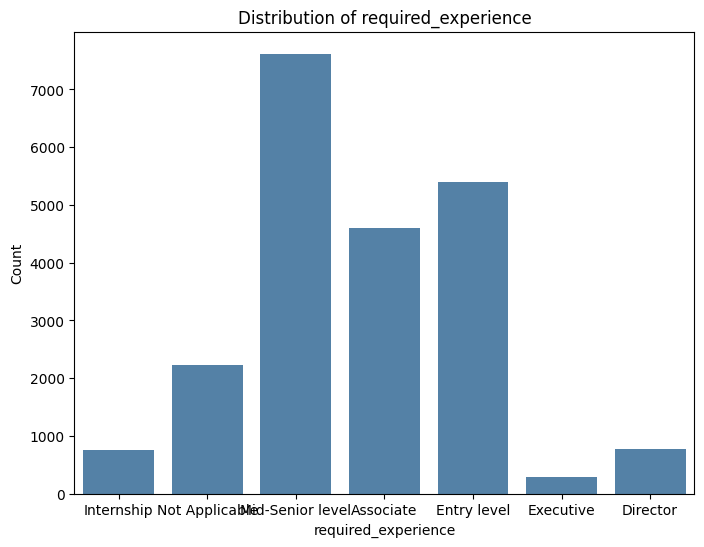

                                   required_education  Ratio
required_education                                          
Bachelor's Degree                               10290  28.78
High School or equivalent                        4160  11.63
Unspecified                                      2794   7.81
Master's Degree                                   832   2.33
Associate Degree                                  548   1.53
Certification                                     340   0.95
Some College Coursework Completed                 204   0.57
Professional                                      148   0.41
Vocational                                         98   0.27
Some High School Coursework                        54   0.15
Doctorate                                          52   0.15
Vocational - HS Diploma                            18   0.05
Vocational - Degree                                12   0.03


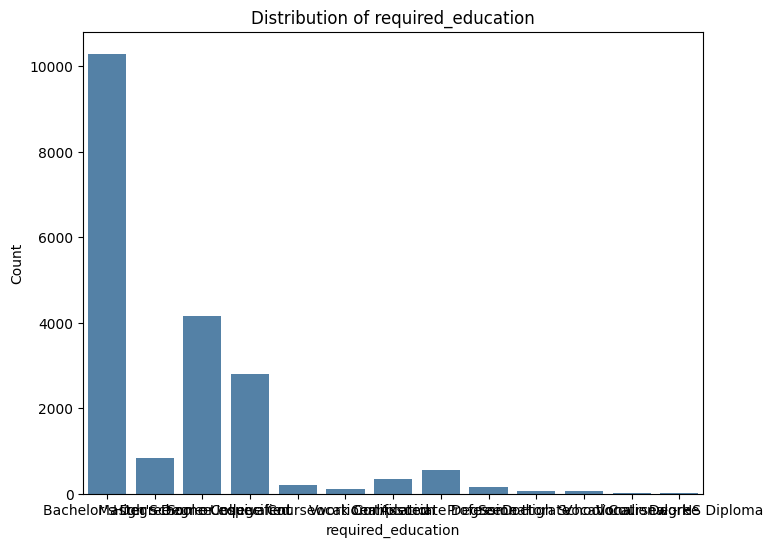

               telecommuting  Ratio
telecommuting                      
0                      34226  95.71
1                       1534   4.29


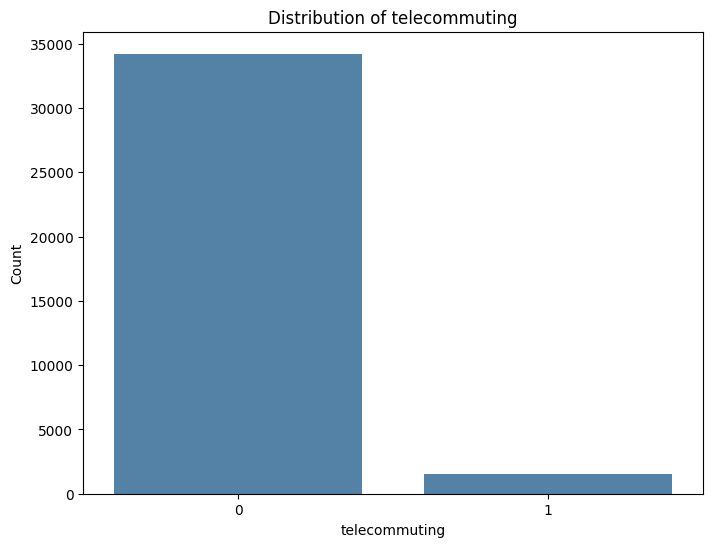

                  has_company_logo  Ratio
has_company_logo                         
1                            28440  79.53
0                             7320  20.47


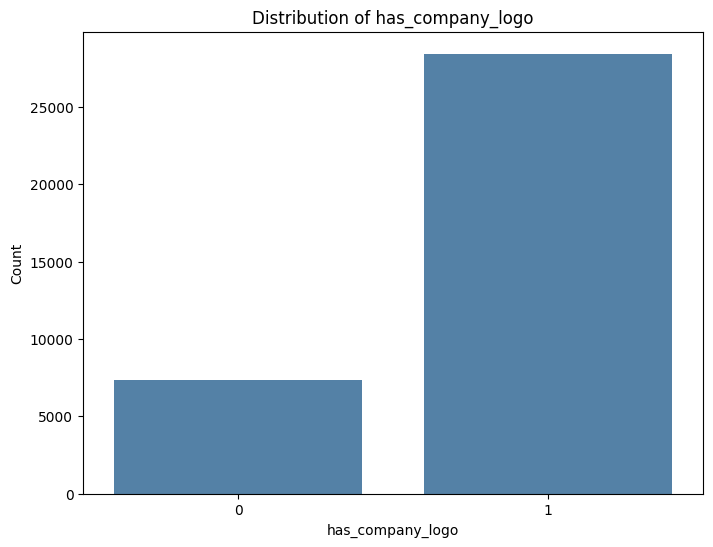

               has_questions  Ratio
has_questions                      
0                      18176  50.83
1                      17584  49.17


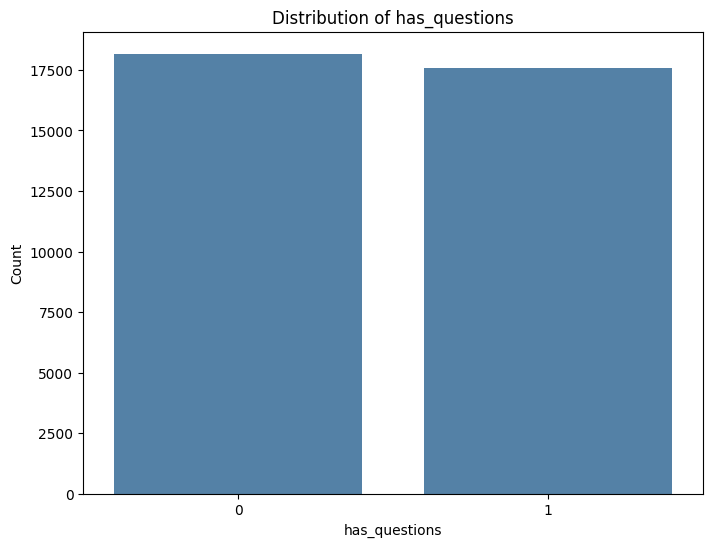

            fraudulent  Ratio
fraudulent                   
0                34028  95.16
1                 1732   4.84


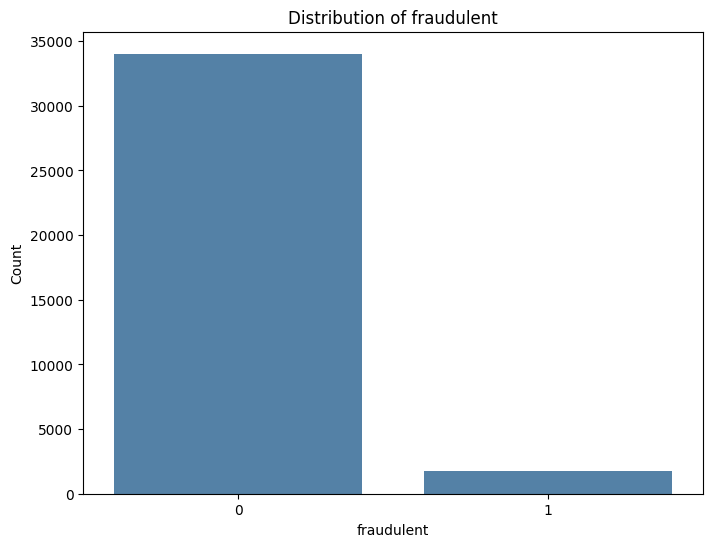

               telecommuting  Ratio
telecommuting                      
0                      34226  95.71
1                       1534   4.29


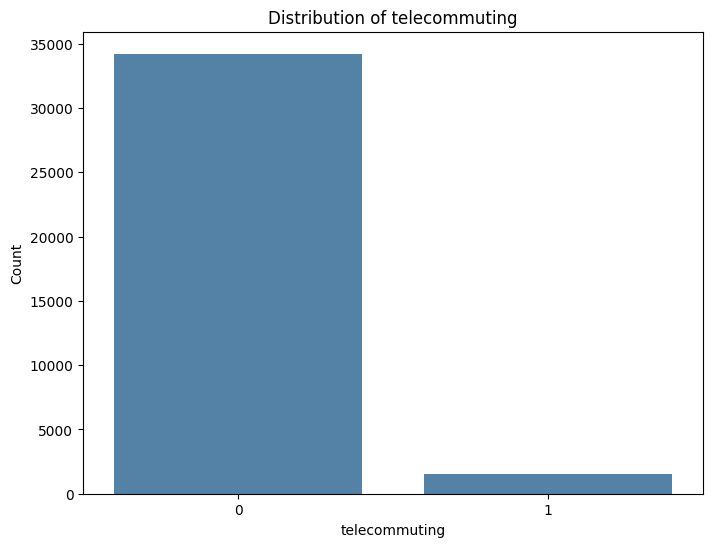

                  has_company_logo  Ratio
has_company_logo                         
1                            28440  79.53
0                             7320  20.47


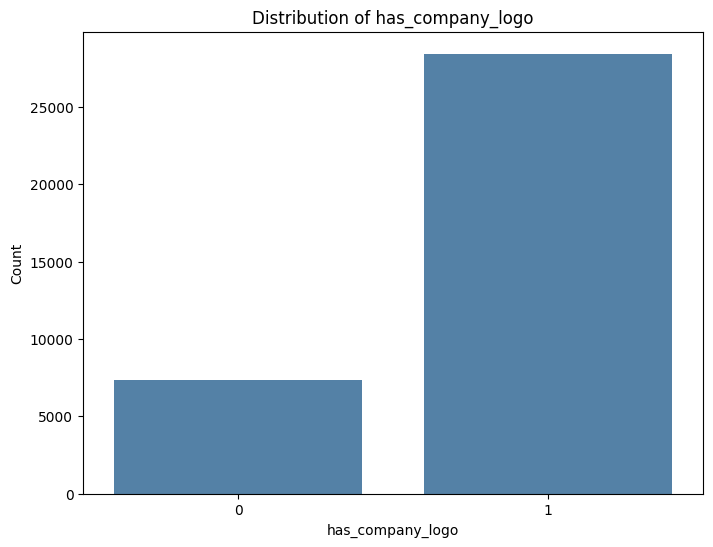

               has_questions  Ratio
has_questions                      
0                      18176  50.83
1                      17584  49.17


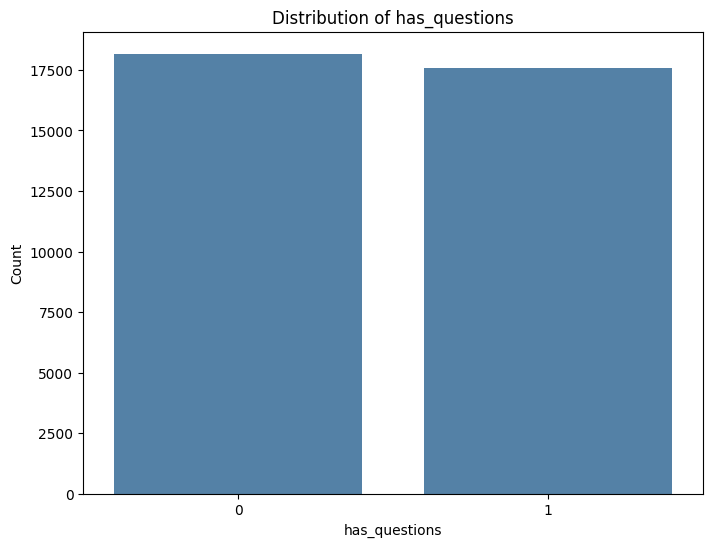

            fraudulent  Ratio
fraudulent                   
0                34028  95.16
1                 1732   4.84


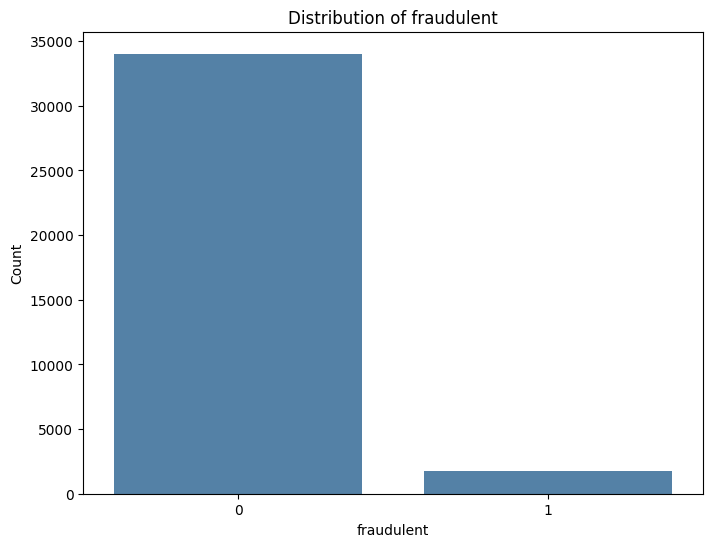

In [40]:


def cat_summary(dataframe, col_name, plot=False):
    """
    Kategorik ve numerik ama kategorik değişkenlerin özet analizi.
    """
    # Değişkenin değer sayıları ve oranlarını hesapla
    summary = pd.DataFrame({
        col_name: dataframe[col_name].value_counts(),
        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)
    })
    print(summary)

    # Plot isteğe bağlı olarak eklenir
    if plot:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=dataframe[col_name], color='steelblue')  # Tek renk kullanımı
        plt.title(f"Distribution of {col_name}")
        plt.xlabel(col_name)
        plt.ylabel('Count')
        plt.show()

# Kategorik ve numerik ama kategorik değişkenlerin seçimi için fonksiyon
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Verilen dataframe için kategorik, numerik ve kategorik görünümlü numerik değişkenleri yakalar.
    """
    # Kategorik değişkenler
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    # Numerik ama kategorik olarak değerlendirilen değişkenler
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]

    # Kategorik ama kardinal değişkenler
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    # Kategorik değişkenler ve numerik ama kategorik değişkenler
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Sayısal değişkenler
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and col not in num_but_cat]

    return cat_cols, cat_but_car, num_cols, num_but_cat

# Kategorik, sayısal ve kategorik görünümlü sayısal değişkenleri elde et
cat_cols, cat_but_car, num_cols, num_but_cat = grab_col_names(df)

# Kategorik ve numerik ama kategorik değişkenler üzerinde analiz yapıyoruz
for col in cat_cols + num_but_cat:
    cat_summary(df, col, plot=True)



#📌**3- Sayısal Değişken Analizi (Analysis of Numerical Variables)**


- veri setimizde sayısal bir değişken bulunmamaktadır.
- 'job_id' değişkenini kardinal değişken olarak değerlendiriyoruz.


#📌**4- Kardinal Değişken Analizi (Analysis of Cardinal Variables)**



In [41]:
# 'job_id' değişkenini kardinal değişken olarak değerlendirme
df['job_id'] = df['job_id'].astype('str')

# Kardinal değişkenler listesini belirleme (benzersiz değer sayısı yüksek olan kategorik değişkenler)
cat_but_car = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 20]

# Eğer 'job_id' kardinal değişkenler listesine dahil değilse ekleyin
if 'job_id' not in cat_but_car:
    cat_but_car.append('job_id')

# Kardinal değişkenlerin listesini yazdır
print("Kardinal değişkenler:")
for col in cat_but_car:
    print(f"{col}")

# Sayısal değişkenler listesini güncelle (sayısal görünümlü kategorik değişkenleri hariç tutma)
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
num_but_cat = [col for col in num_cols if df[col].nunique() < 10]  # Kategorik görünümlü sayısal değişkenler (benzersiz değer sayısı küçük olanlar)
num_cols_adjusted = [col for col in num_cols if col not in num_but_cat]

# Sayısal değişken bulunup bulunmadığını kontrol et
if not num_cols_adjusted:
    print("Bu veri setinde sayısal değişken bulunmamaktadır.")
else:
    print("Sayısal değişkenler:")
    for col in num_cols_adjusted:
        print(f"{col}")


Kardinal değişkenler:
job_id
title
location
department
salary_range
company_profile
description
requirements
benefits
industry
function
Bu veri setinde sayısal değişken bulunmamaktadır.


👩‍🎨 **Kardinal Değişkenlerin Dağılımını Görselleştirme**

 Kardinal değişkenler, birçok benzersiz değer içeren kategorik değişkenlerdir ve bu değişkenlerin analiz edilmesi veri setinin içeriği hakkında önemli bilgiler sunar.

 Belirli bir kardinal değişkenin en sık tekrar eden ilk top_n değerini bar grafiği olarak gösteriyoruz

 Bu görselleştirme, kardinal değişkenlerin dağılımını ve hangi değerlerin daha yaygın olduğunu analiz etmeyi kolaylaştırır.

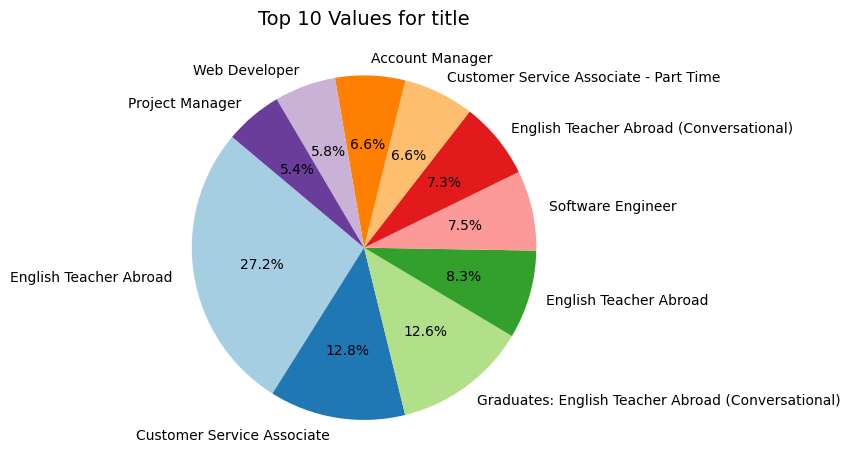

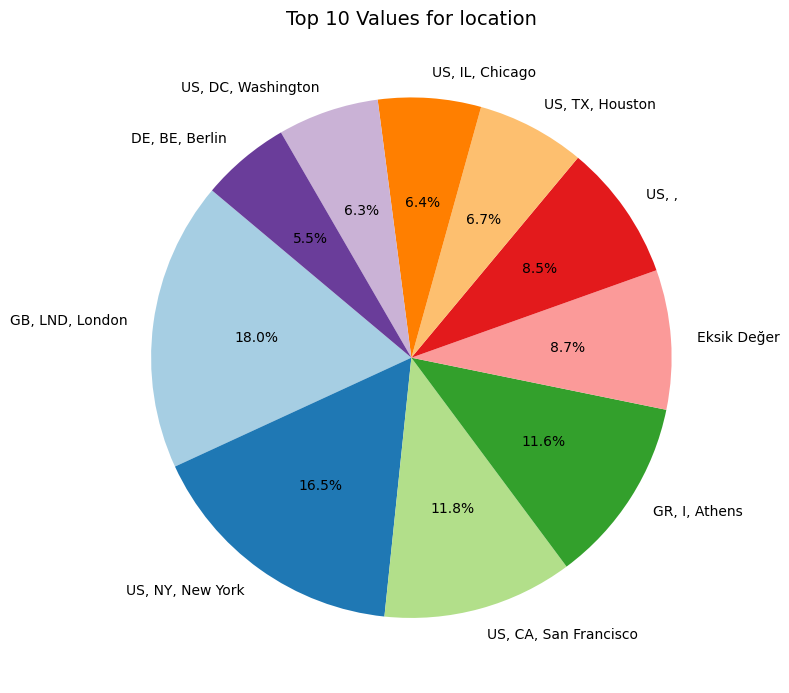

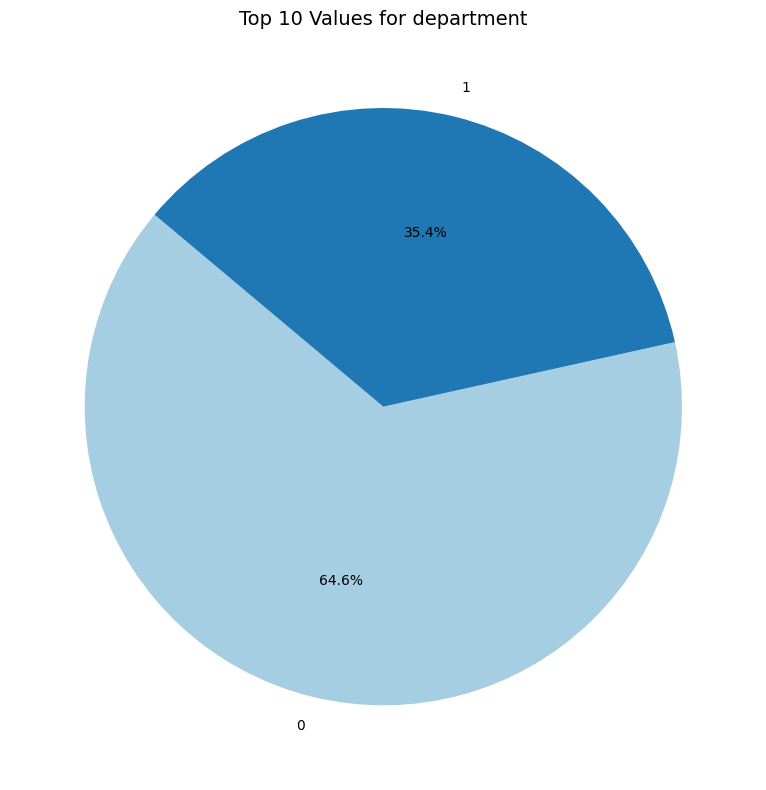

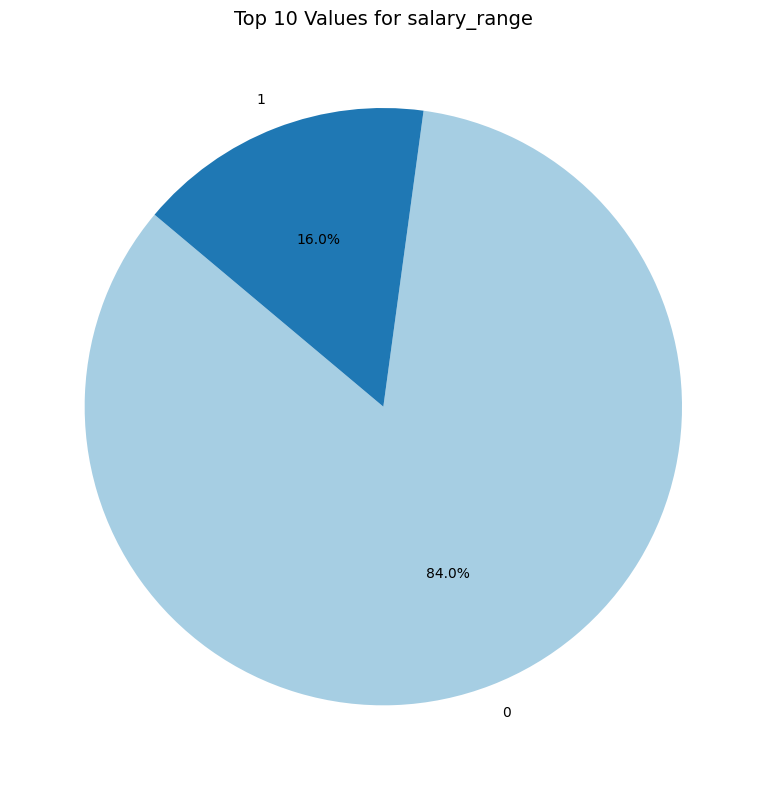

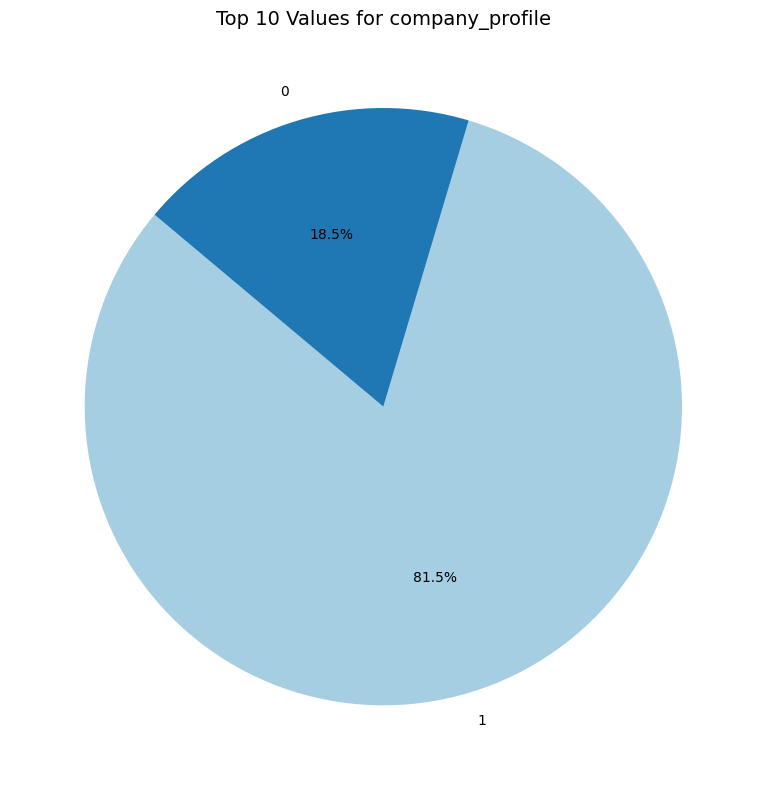

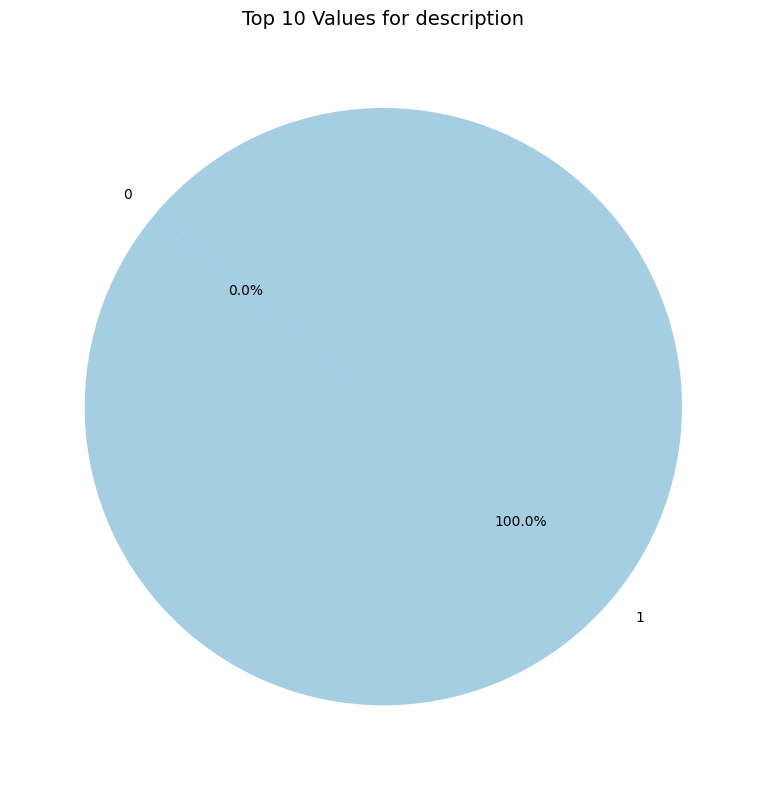

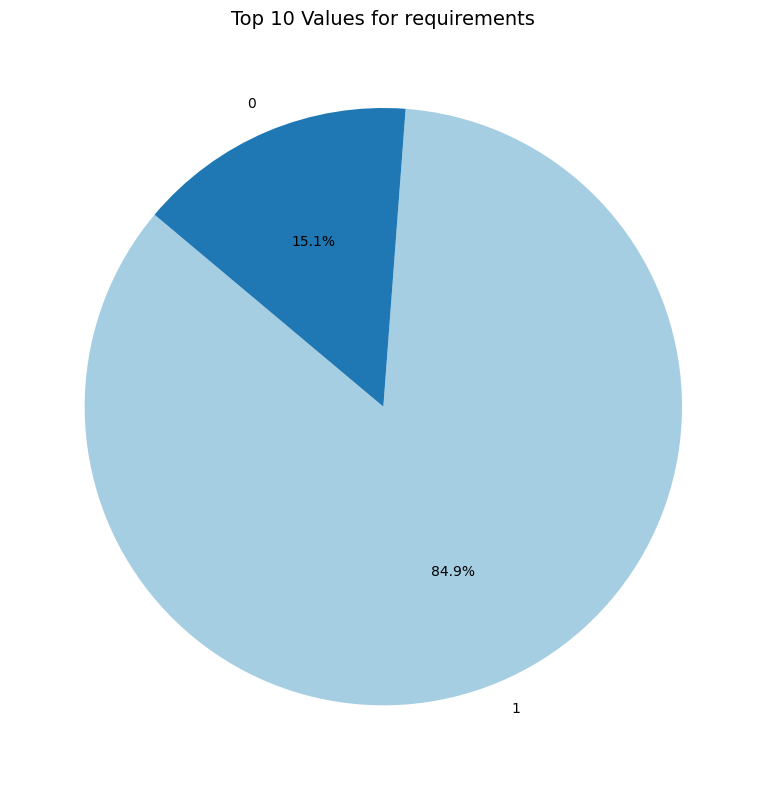

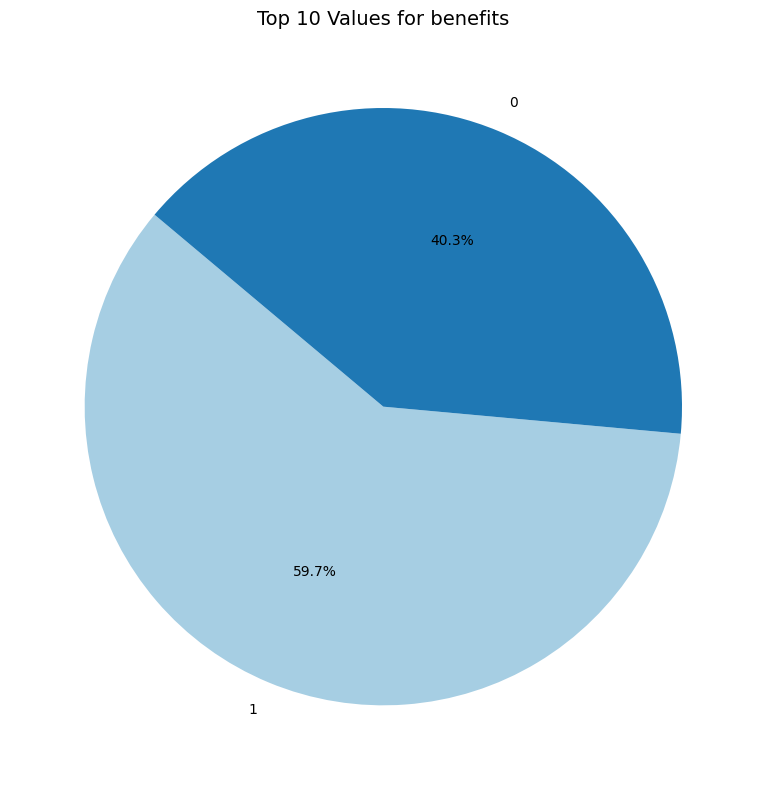

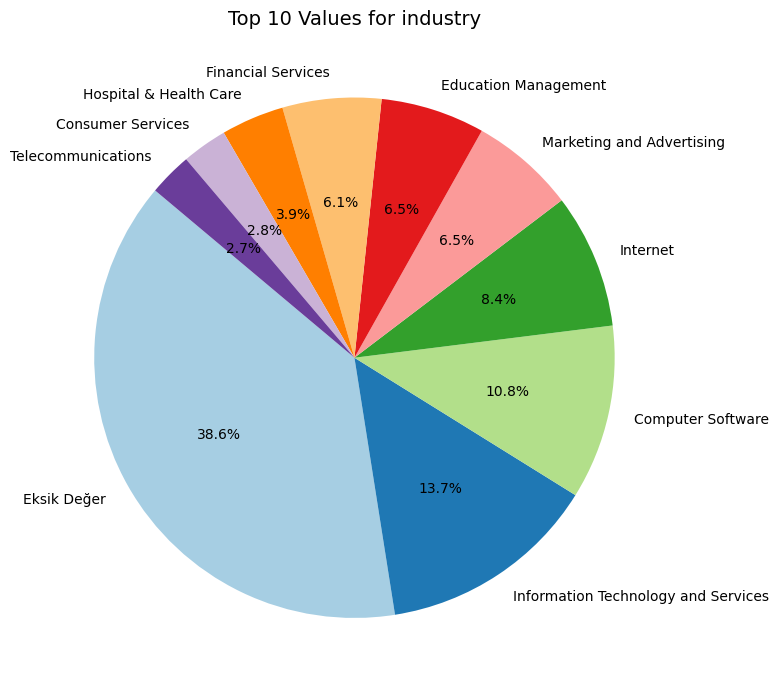

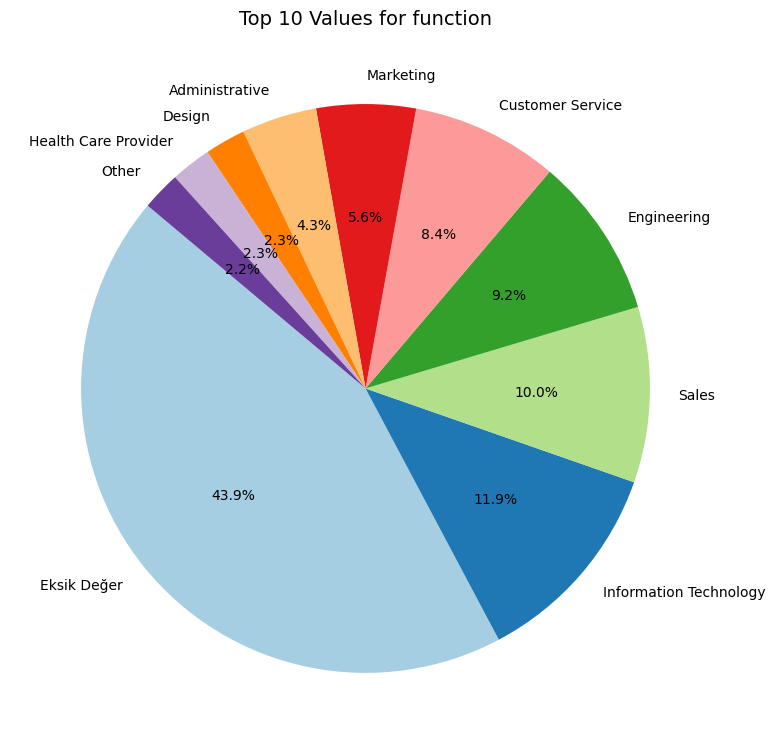

In [42]:
# Kategorik sütunları 0 ve 1'e dönüştüren fonksiyon
def encode_binary(dataframe, columns):
    """
    Belirtilen sütunlardaki eksik değerleri 0 ve dolu değerleri 1'e dönüştürür.
    """
    for col in columns:
        if col in dataframe.columns:
            dataframe[col] = dataframe[col].apply(lambda x: 0 if pd.isna(x) else 1)

# Kardinal değişkenlerin listesi
cardinal_cols = ['title', 'location', 'department', 'salary_range', 'company_profile',
                 'description', 'requirements', 'benefits', 'industry', 'function']

# Binarize (0,1) edilecek kategorik değişkenler
binary_cols = ['company_profile', 'description', 'department', 'benefits', 'salary_range', 'requirements']

# Kategorik değişkenleri 0 ve 1'e dönüştür
encode_binary(df, binary_cols)

# Kardinal değişkenler için en sık tekrar eden değerleri pasta grafiği ile görselleştirir
def plot_top_cardinal_pie(dataframe, col_name, top_n=10):
    """
    Kardinal değişkenler için en sık tekrar eden değerleri pasta grafiği ile görselleştirir.
    """
    # En sık tekrar eden değerleri hesapla ve eksik değerleri dahil et
    top_values = dataframe[col_name].value_counts(dropna=False).head(top_n)

    # NaN değerler için bir adlandırma ekle (Eğer varsa)
    top_values.index = top_values.index.fillna('Eksik Değer')

    # Grafik oluştur
    plt.figure(figsize=(8, 8))
    top_values.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                    colors=plt.cm.Paired(range(len(top_values))), wedgeprops={'edgecolor': 'none'})
    plt.title(f"Top {top_n} Values for {col_name}", fontsize=14)
    plt.ylabel('')  # Pasta grafikte y-etiketi kullanılmaz
    plt.tight_layout()
    plt.show()

# Kardinal değişkenler üzerinde pasta grafiği ile analiz yapıyoruz
for col in cardinal_cols:
    plot_top_cardinal_pie(df, col, top_n=10)




#📌 **5 - Hedef Değişken Analizi (Analysis of Target Variable)**

Hedef değişken olarak "fraudulent" bağımlı değişkenimi kullanılarak yapılan analiz, bu değişkenin dağılımını, özet istatistiklerini ve diğer değişkenlerle ilişkisini incelemeyi içeriyor. İşte fraudulent değişkeni üzerinden bu analizi  adımları:

*  Hedef Değişkenin Dağılımını İnceleme
* Hedef Değişkenin Özet İstatistiklerini Hesaplama
*  Hedef Değişkenin Diğer Değişkenlerle İlişkisini İnceleme





⛳️ **Hedef Değişkenin Dağılımını İnceleme**

* Amaç: Hedef değişkenin hangi sınıflarda ne kadar sıklıkta yer aldığını belirlemek. Bu adım, verinin hedef değişkeninin sınıf dağılımını anlamaya yardımcı olur.

* Yöntem: Count Plot ile frekans dağılımını ve oranlarını görselleştirmek. Count Plot, her sınıfın veri setindeki sıklığını kolayca görebilmenizi sağlar. Bu grafik, hedef değişkenin dağılımını net bir şekilde gösterir ve hangi sınıfların daha yaygın olduğunu anlamamıza yardımcı olur.



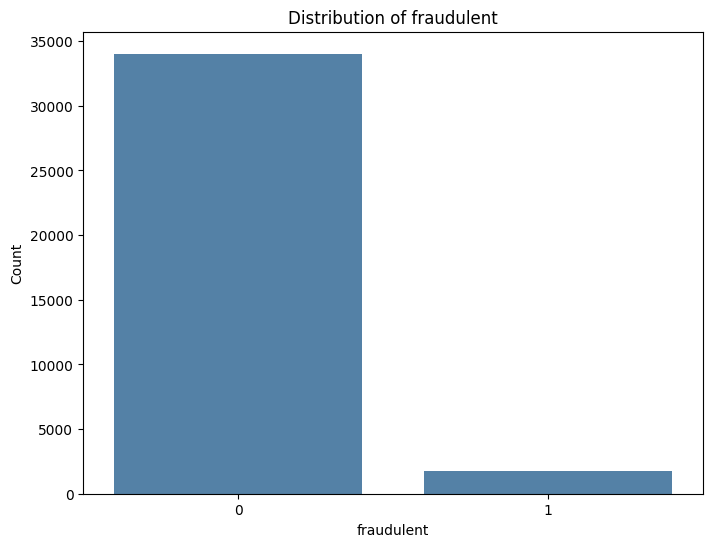

In [45]:
def plot_target_distribution(dataframe, col_name):
    """Hedef değişkenin dağılımını görselleştirir."""
    plt.figure(figsize=(8, 6))
    sns.countplot(x=dataframe[col_name], color='steelblue')  # Standart renk kullanımı
    plt.title(f"Distribution of {col_name}")
    plt.xlabel(col_name)
    plt.ylabel('Count')
    plt.show()

# Hedef değişkenin dağılımını inceleyin
plot_target_distribution(df, 'fraudulent')

⛳️ **Hedef Değişkenin Özet İstatistiklerini Hesaplama**

 *  Amaç: Hedef değişkenin temel özelliklerini anlamak için sayısal özet istatistikleri hesaplamak.
 *  Yöntem: Sınıfların sayısını ve oranlarını hesaplamak.

In [46]:
def target_summary(dataframe, col_name):
    """Hedef değişkenin özet istatistiklerini yazdırır."""
    print(f"Summary statistics for {col_name}:")
    print(dataframe[col_name].value_counts())
    print(dataframe[col_name].value_counts(normalize=True))

# Hedef değişkenin özet istatistiklerini inceleyin
target_summary(df, 'fraudulent')

Summary statistics for fraudulent:
fraudulent
0    34028
1     1732
Name: count, dtype: int64
fraudulent
0   0.95
1   0.05
Name: proportion, dtype: float64


⛳️ **Hedef Değişkenin Diğer Değişkenlerle İlişkisini İnceleme**

Bu analizde, her bir değişkenin "Fraudulent" hedef değişkeniyle olan ilişkisini inceliyoruz. Amaç, hedef değişkenin 0 (gerçek) ve 1 (sahte) değerlerini gösteren değişkenleri analiz etmektir. Analiz aşamaları şunlardır:

1. Hedef Değişkenin Sahte İş İlanlarını Hesaplama: Hedef değişkenin değeri 1 olan (sahte) iş ilanlarının sayısını hesaplarız.
2. Sonuçları Yazdırma: Sahte iş ilanlarının en yüksek olduğu değişkenleri sıralar ve yazdırırız.

Bu kod, hem kategorik hem de kardinal değişkenler üzerinde çalışarak, hangi değişkenlerin en fazla sahte iş ilanına sahip olduğunu belirlemenizi sağlar.

In [47]:
# Kategorik, kardinal ve sayısal ama kategorik değişkenlerin listelerini oluştur
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
cardinal_cols = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() > 20]
num_but_cat_cols = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtype != 'object']

# Üç listeyi birleştir
target_related_cols = list(set(categorical_cols + cardinal_cols + num_but_cat_cols))

# Sahte iş ilanlarının sayısını ve toplam iş ilanlarını hesaplamak için bir sözlük oluştur
fraudulent_counts = {}
total_counts = {}

# Her değişken üzerinde döngü
for col in target_related_cols:
    # Sahte iş ilanlarının sayısını hesapla
    fraudulent_count = df[df['fraudulent'] == 1][col].value_counts()
    # Toplam iş ilanı sayısını hesapla
    total_count = df[col].value_counts()

    if len(fraudulent_count) > 0:
        fraudulent_counts[col] = fraudulent_count.head(1).values[0]  # En fazla sahte iş ilanı olan değeri al

    if len(total_count) > 0:
        total_counts[col] = total_count.head(1).values[0]  # En fazla iş ilanı olan toplam sayıyı al

# Sahte iş ilanlarının en yüksek olduğu değişkenleri sıralayın
sorted_fraudulent_counts = sorted(fraudulent_counts.items(), key=lambda x: x[1], reverse=True)

# Sonuçları düzgün bir şekilde yazdır
print("Hedef değişkene göre en fazla sahte iş ilanına sahip değişkenler ve toplam iş ilanları:")
for col, count in sorted_fraudulent_counts:
    total = total_counts.get(col, 0)  # Toplam iş ilanı sayısı, eğer yoksa 0
    print(f"{col}: {count} sahte iş ilanı, toplam {total} iş ilanı")


Hedef değişkene göre en fazla sahte iş ilanına sahip değişkenler ve toplam iş ilanları:
fraudulent: 1732 sahte iş ilanı, toplam 34028 iş ilanı
description: 1730 sahte iş ilanı, toplam 35758 iş ilanı
telecommuting: 1604 sahte iş ilanı, toplam 34226 iş ilanı
requirements: 1424 sahte iş ilanı, toplam 30368 iş ilanı
salary_range: 1286 sahte iş ilanı, toplam 30024 iş ilanı
has_questions: 1232 sahte iş ilanı, toplam 18176 iş ilanı
company_profile: 1174 sahte iş ilanı, toplam 29144 iş ilanı
has_company_logo: 1166 sahte iş ilanı, toplam 28440 iş ilanı
department: 1062 sahte iş ilanı, toplam 23094 iş ilanı
benefits: 1004 sahte iş ilanı, toplam 21336 iş ilanı
employment_type: 980 sahte iş ilanı, toplam 23240 iş ilanı
required_experience: 358 sahte iş ilanı, toplam 7618 iş ilanı
required_education: 340 sahte iş ilanı, toplam 10290 iş ilanı
function: 238 sahte iş ilanı, toplam 3498 iş ilanı
industry: 218 sahte iş ilanı, toplam 3468 iş ilanı
location: 184 sahte iş ilanı, toplam 1436 iş ilanı
title:

⛳️⭐📌 **Hedef Değişkenin Diğer Değişkenlerle İlişkisinin Analizi**

En Fazla Sahte İlan:  
- Description: 1730 sahte ilan (toplam 35758)  
  - Yorum: Yüksek oranda sahte ilan içeren bir değişken.

- Telecommuting: 1604 sahte ilan (toplam 34226)  
  - Yorum: Sahte ilanların önemli bir kısmını oluşturan bir değişken.

- Requirements: 1424 sahte ilan (toplam 30368)  
  - Yorum: Sahte ilanlar için yüksek oranda ilişkiye sahip.

- Salary Range: 1286 sahte ilan (toplam 30024)  
  - Yorum: Sahte ilanlarda yüksek bir oranla ilişkilidir.

- Has Questions: 1232 sahte ilan (toplam 18176)  
  - Yorum: Önemli bir sahte ilan göstergesi.

- Company Profile: 1174 sahte ilan (toplam 29144)  
  - Yorum: Sahte ilanların önemli bir kısmını içermektedir.

- Has Company Logo: 1166 sahte ilan (toplam 28440)  
  - Yorum: Sahte ilanlarla yüksek ilişkiye sahiptir.

- Department: 1062 sahte ilan (toplam 23094)  
  - Yorum: Yüksek oranda sahte ilan içeren bir değişken.

- Benefits: 1004 sahte ilan (toplam 21336)  
  - Yorum: Sahte ilanlarda orta derecede ilişkilidir.

- Employment Type: 980 sahte ilan (toplam 23240)  
  - Yorum: Sahte ilanlarla orta seviyede ilişkilidir.

- Required Experience: 358 sahte ilan (toplam 7618)  
  - Yorum: Sahte ilanlarda daha düşük bir ilişkiye sahip.

- Required Education: 340 sahte ilan (toplam 10290)  
  - Yorum: Sahte ilanlarla düşük ilişkiye sahiptir.

- Function: 238 sahte ilan (toplam 3498)  
  - Yorum: Sahte ilanlarla orta derecede ilişkilidir.

- Industry: 218 sahte ilan (toplam 3468)  
  - Yorum: Orta derecede sahte ilan ilişkisi gösterir.

- Location: 184 sahte ilan (toplam 1436)  
  - Yorum: Sahte ilanlarla düşük ilişkiye sahiptir.

- Title: 42 sahte ilan (toplam 622)  
  - Yorum: Sahte ilanlarla çok düşük ilişkiye sahiptir.

- Job ID: 2 sahte ilan (toplam 2)  
  - Yorum: Neredeyse tüm ilanlar sahte değ


---

📌 **Hedef Değişkene Göre Yüzdelik Oran Hesaplaması**


---

In [48]:
def calculate_fraud_percentage(dataframe, feature_col, target_col='fraudulent'):
    """Her bir değişken değeri için sahte iş ilanlarının oranını hesaplar."""
    fraud_percentages = (dataframe.groupby(feature_col)[target_col].mean() * 100).sort_values(ascending=False)
    return fraud_percentages

# Kategorik değişkenleri otomatik belirleme
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
# Kardinal değişkenleri belirleme
cardinal_cols = [col for col in categorical_cols if df[col].nunique() > 20]
# Sayısal ama kategorik olarak değerlendirilen değişkenleri belirleme
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
num_but_cat_cols = [col for col in num_cols if df[col].nunique() < 10]  # Benzersiz değeri az olan sayısal değişkenler

# Tüm ilgili değişkenlerin listesi
target_related_cols = categorical_cols + cardinal_cols + num_but_cat_cols

# Her bir değişken için yüzdelik oranları hesapla ve yazdır
for col in target_related_cols:
    print(f"Yüzdelik oranlar ({col}):")
    if col in df.columns:  # Değişkenin df içinde var olduğundan emin ol
        fraud_percentage = calculate_fraud_percentage(df, col)
        print(fraud_percentage)
    else:
        print(f"{col} değişkeni veri setinde bulunmamaktadır.")
    print("\n")


Yüzdelik oranlar (job_id):
job_id
5809    100.00
17621   100.00
17572   100.00
17573   100.00
17574   100.00
         ...  
15307     0.00
15308     0.00
15309     0.00
1531      0.00
9999      0.00
Name: fraudulent, Length: 17880, dtype: float64


Yüzdelik oranlar (title):
title
Offshore Construction Superintendent                                100.00
KMC                                                                 100.00
Receptionist and Office Assistant                                   100.00
Typist / Data Processing Clerical                                   100.00
Accounting Clerk/ $23                                               100.00
                                                                     ...  
Full-Time Caregiver for a Shy Young Man                               0.00
Full-Time Caregiver for a Sweet and Easygoing Woman                   0.00
Full-Time Caregiver for an Active Young Man                           0.00
Full-Time Caregiver for an Agreeable, Shy Yo

# 🔗📊Çapraz Tablo Analizi (Crosstab)

 • Kategorik değişkenler ile hedef değişkenin ilişkisini incelemek için çapraz tablo (crosstab) analizi


 Daha önce tespit ettiğimiz sahte iş ilanları sayısı yüksek olan kategorik değişkenleri kullanarak çapraz tablo analizi yapacağız.

 **En fazla sahte iş ilanına sahip değişkenler:**
- employment_type
- required_experience
- required_education
- telecommuting
- has_company_logo
- has_questions

Uyarlanmış kod:
Bu kod, her bir değişken için sahte iş ilanlarının (1) ve gerçek iş ilanlarının (0) oranlarını hesaplar:

In [51]:
def crosstab_analysis(dataframe, feature_col, target_col='fraudulent'):
    """Kategorik değişken ile hedef değişken arasındaki ilişkileri çapraz tablo analizi ile inceler."""
    crosstab = pd.crosstab(dataframe[feature_col], dataframe[target_col], margins=True, margins_name="Total")
    # Oranları hesapla
    crosstab_percentage = crosstab.div(crosstab.loc['Total'], axis=1) * 100
    return crosstab_percentage

# Kategorik değişkenler
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions']

# Her kategorik değişken için çapraz tablo analizi
for col in categorical_cols:
    print(f"Çapraz Tablo Analizi ({col}):")
    crosstab_result = crosstab_analysis(df, col)    # Çapraz tabloyu formatlayarak yüzdelik işareti ekleme
    formatted_result = crosstab_result.apply(lambda x: x.map(lambda y: f"{y:.2f}%"))    # Çapraz tabloyu yazdır
    print(formatted_result)
    print("\n")


Çapraz Tablo Analizi (employment_type):
fraudulent             0        1    Total
employment_type                           
Contract          10.74%    7.04%   10.58%
Full-time         80.75%   78.40%   80.64%
Other              1.54%    2.40%    1.58%
Part-time          5.25%   11.84%    5.53%
Temporary          1.73%    0.32%    1.67%
Total            100.00%  100.00%  100.00%


Çapraz Tablo Analizi (required_experience):
fraudulent                 0        1    Total
required_experience                           
Associate             21.68%    9.74%   21.21%
Director               3.58%    3.94%    3.59%
Entry level           24.21%   41.53%   24.90%
Executive              1.26%    2.32%    1.30%
Internship             3.57%    2.32%    3.52%
Mid-Senior level      35.54%   26.22%   35.17%
Not Applicable        10.15%   13.92%   10.30%
Total                100.00%  100.00%  100.00%


Çapraz Tablo Analizi (required_education):
fraudulent                               0        1    

🔗📊 **Çapraz Tablo Analizi: Kısa Değerlendirme**

1. Employment Type:
   - Full-time: %78.40. Tam zamanlı iş ilanları yüksek sahte oranına sahip.
   - Part-time: %11.84. Part zamanlı işlerin sahte olma olasılığı belirgin ama düşük.
   - Contract: %7.04. Sözleşmeli işlerin sahte olma olasılığı en düşük.

2. Required Experience:
   - Entry Level: %41.53. Giriş seviyesindeki ilanlar yüksek sahte oranına sahip.
   - Mid-Senior Level: %26.22. Orta ve üst düzey pozisyonlar sahte olma olasılığı yüksek ama giriş seviyesinden düşük.

3. Required Education:
   - High School or Equivalent: %40.96. Lise diploması gerektiren ilanlar yüksek sahte oranına sahip.
   - Bachelor's Degree: %24.10. Lisans diploması gerektiren ilanların sahte olma olasılığı daha düşük.

4. Telecommuting:
   - 0 (Yok): %92.61. Telecommuting olmayan ilanların sahte olma olasılığı çok yüksek.
   - 1 (Var): %7.39. Telecommuting olan ilanların sahte olma olasılığı düşük.

5. Has Company Logo:
   - 0 (Yok): %67.32. Şirket logosu olmayan ilanlar yüksek sahte oranına sahip.
   - 1 (Var): %32.68. Şirket logosu olan ilanlar daha az sahte.

6. Has Questions:
   - 0 (Yok): %71.13. Soru içermeyen ilanların sahte olma olasılığı yüksek.
   - 1 (Var): %28.87. Soru içeren ilanlar daha az sahte.

Özet: Full-time, entry level ve lise diploması gerektiren ilanlar en yüksek sahte oranına sahip. Telecommuting, şirket logosu ve soru içeren ilanlar ise daha az sahte. Bu, sahte ilanları tespit etmede önemli ipuçları sağlar.

#⚡️ Gözetimli Öğrenme Algoritmaları ile Analiz (Analysis with Supervised Learning Algorithms)

# Lojistik Regresyon (Logistic Regression)

✨✨✨


In [53]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Özellikler ve hedef değişkenler
X = df.drop('fraudulent', axis=1)  # 'fraudulent' hedef değişkenini çıkartın
y = df['fraudulent']  # Hedef değişken

# Kategorik verileri sayısal verilere dönüştürün
le = LabelEncoder()
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col].astype(str))

# Özellik ölçeklendirmesi yapın
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Lojistik Regresyon Modelini oluşturun ve eğitim yapın
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Tahminler yapın
y_pred = model.predict(X_test)

# Model performansını değerlendirin
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")



Confusion Matrix:
[[10214    23]
 [  435    56]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10237
           1       0.71      0.11      0.20       491

    accuracy                           0.96     10728
   macro avg       0.83      0.56      0.59     10728
weighted avg       0.95      0.96      0.94     10728


Accuracy: 0.9573079791200596


#🟡 Logistic Regression Sonuçlarının Analizi:

Karışıklık Matrisi:
- True Negatives (TN): 10,214  
  - Gerçekten sahte olmayan ve modelin de sahte olmayan olarak tahmin ettiği ilanlar.
- False Negatives (FN): 435  
  - Gerçekten sahte olan ancak modelin sahte olmayan olarak tahmin ettiği ilanlar.
- True Positives (TP): 56  
  - Gerçekten sahte olan ve modelin sahte olarak tahmin ettiği ilanlar.
- False Positives (FP): 23  
  - Gerçekten sahte olmayan ama modelin sahte olarak tahmin ettiği ilanlar.

Sınıflandırma Raporu:
- Precision:  
  - 0 (Sahte Olmayan): 0.96  
    - Sahte olmayan ilanları doğru tahmin etme başarısı yüksek.
  - 1 (Sahte): 0.71  
    - Sahte ilanları tahmin etme başarısı düşük.
  
- Recall:  
  - 0 (Sahte Olmayan): 1.00  
    - Gerçek sahte olmayan ilanları yakalama oranı yüksek.
  - 1 (Sahte): 0.11  
    - Gerçek sahte ilanları yakalama oranı çok düşük.
  
- F1-Score:  
  - 0 (Sahte Olmayan): 0.98  
    - Precision ve recall'in dengeli ölçümü yüksek.
  - 1 (Sahte): 0.20  
    - Precision ve recall'in dengeli ölçümü düşük.

Doğruluk (Accuracy): 0.957  
  - Genel doğru tahmin oranı yüksek (%95), ancak bu oran modelin sahte ilanları yakalama başarısızlığını gizleyebilir.






#Rastgele Orman (Random Forest)

Çok sayıda karar ağacının bir araya geldiği ve sonuçların çoğunluk oyuna göre belirlendiği bir topluluk öğrenme yöntemidir. Python’da scikit-learn kütüphanesini kullanarak bu algoritmayı uygulayabiliriz. İşte genel bir rastgele orman modeli kodu:

✨✨✨

**1. Veri Setini Hazırlama**

Veri setinizi yükleyin ve özellikler (features) ile hedef değişkeni (target) ayırın

In [54]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Özellikler ve hedef değişkenler
X = df[['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions']].copy()
y = df['fraudulent']

# Kategorik verileri sayısal verilere dönüştürün
le = LabelEncoder()
for col in ['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions']:
    X[col] = le.fit_transform(X[col].astype(str))

# Özellik ölçeklendirmesi yapın
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Rastgele Orman modelini oluşturun
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğitim seti ile eğitin
rf_model.fit(X_train, y_train)

# Tahminler yapın
y_pred = rf_model.predict(X_test)

# Model performansını değerlendirin
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")


Confusion Matrix:
[[10198    39]
 [  418    73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10237
           1       0.65      0.15      0.24       491

    accuracy                           0.96     10728
   macro avg       0.81      0.57      0.61     10728
weighted avg       0.95      0.96      0.94     10728


Accuracy: 0.9574011931394482


# 🟢Random Forest Sonuçlarının Analizi:

Random Forest Sonuçlarının Analizi:

Karışıklık Matrisi:
- True Negatives (TN): 10,198  
  - Gerçekten sahte olmayan ve modelin de sahte olmayan olarak tahmin ettiği ilanlar.
- False Negatives (FN): 418  
  - Gerçekten sahte olan ancak modelin sahte olmayan olarak tahmin ettiği ilanlar.
- True Positives (TP): 73  
  - Gerçekten sahte olan ve modelin sahte olarak tahmin ettiği ilanlar.
- False Positives (FP): 39  
  - Gerçekten sahte olmayan ama modelin sahte olarak tahmin ettiği ilanlar.

Sınıflandırma Raporu:
- Precision:  
  - 0 (Sahte Olmayan): 0.96  
    - Sahte olmayan ilanları doğru tahmin etme başarısı yüksek.
  - 1 (Sahte): 0.65  
    - Sahte ilanları tahmin etme başarısı düşük.
  
- Recall:  
  - 0 (Sahte Olmayan): 1.00  
    - Gerçek sahte olmayan ilanları yakalama oranı yüksek.
  - 1 (Sahte): 0.15  
    - Gerçek sahte ilanları yakalama oranı düşük.
  
- F1-Score:  
  - 0 (Sahte Olmayan): 0.98  
    - Precision ve recall'in dengeli ölçümü yüksek.
  - 1 (Sahte): 0.24  
    - Precision ve recall'in dengeli ölçümü düşük.

Doğruluk (Accuracy): 0.957  
  - Genel doğru tahmin oranı %95, ancak bu yüksek oran modelin sahte ilanları yakalama başarısızlığını gizleyebilir.

Analiz ve Çözüm Önerileri:
- Dengesizlik:  
  Model, sahte ilanları yakalamada başarısız. Bu durum, veri setinde ciddi bir dengesizlik olduğunu ve modelin sahte ilanları ayırt etmede yetersiz olduğunu gösterir.






 🔺 **En önemli 3 özelliği sıralamasını ve önem derecelerini inceleyelim.**





En Önemli 3 Değişken:
               Feature  Importance
4     has_company_logo        0.28
2   required_education        0.23
1  required_experience        0.22


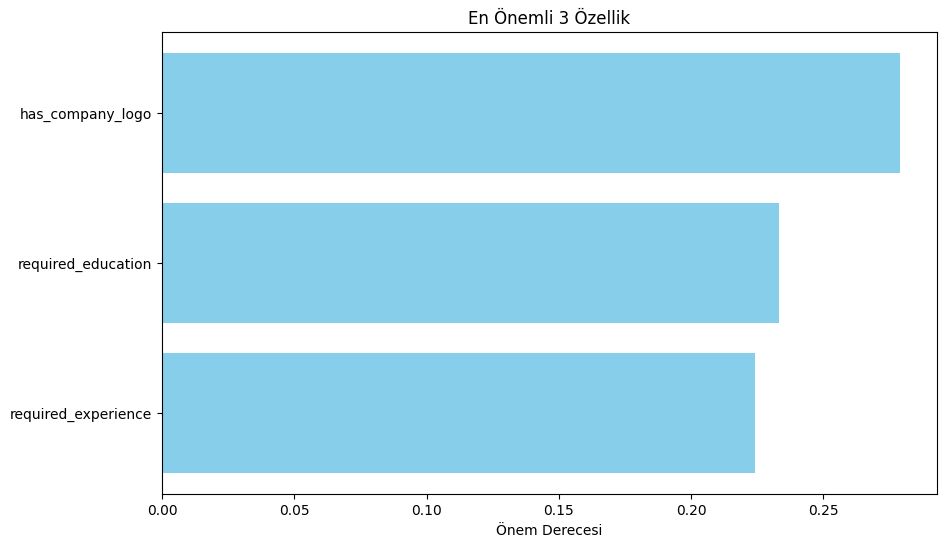

In [55]:
# Özelliklerin önem derecelerini hesaplayın
importances = rf_model.feature_importances_
feature_names = ['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions']

# Önem derecelerini bir DataFrame'e dönüştürün
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# En önemli 3 özelliği yazdırın
print("\nEn Önemli 3 Değişken:")
print(importance_df.head(3))

# Önemli 3 özelliği görselleştirin
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(3), importance_df['Importance'].head(3), color='skyblue')
plt.xlabel('Önem Derecesi')
plt.title('En Önemli 3 Özellik')
plt.gca().invert_yaxis()
plt.show()


**En Önemli 3 Değişken**

1. has_company_logo (Önem Derecesi: 0.28)  
   - Özellik: Şirketin logo ekleyip eklemediği.  
   - Analiz: Şirket logosu, sahte iş ilanlarını ayırt etmede güçlü bir belirleyici olabilir. Logosuz ilanlar daha yüksek olasılıkla sahte olabilir.

2. required_education (Önem Derecesi: 0.23)  
   - Özellik: İlan edilen eğitim seviyesi.  
   - Analiz: Eğitim seviyesi, sahte ilanların genellikle eksik veya belirsiz eğitim bilgileri sunması nedeniyle önemli bir gösterge olabilir.

3. required_experience (Önem Derecesi: 0.22)  
   - Özellik: Gereken deneyim süresi.  
   - Analiz: Deneyim süresi, sahte ilanların genellikle gerçekçi olmayan veya eksik deneyim bilgileri sunması nedeniyle önemlidir.

Genel Analiz:  
- Önem Sıralaması: Bu üç özellik, modelin sahte iş ilanlarını belirlemede en etkili faktörleridir.  
- Kapsam: Toplamda %73'lük önem payı, bu özelliklerin sahte iş ilanlarını tespit etmede kritik rol oynadığını gösterir.


.


#💠 Validation Curve  (Doğrulama Eğrisi) Grafiği


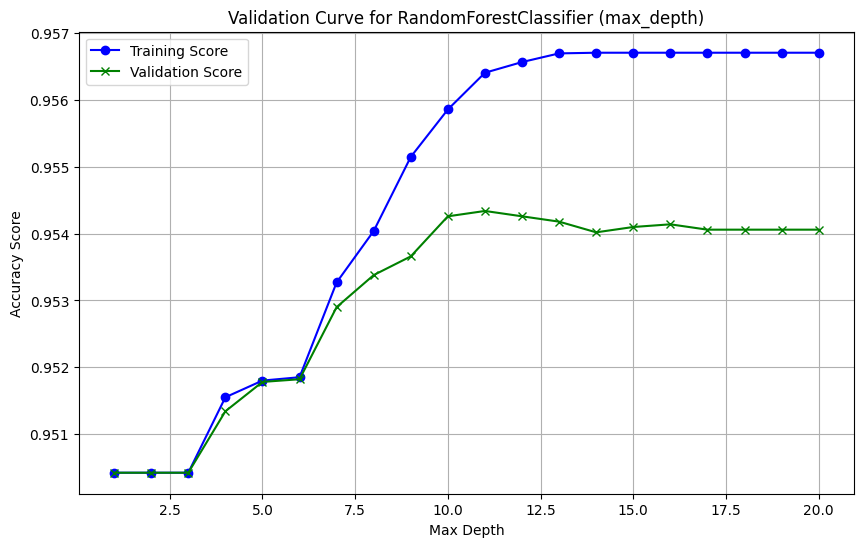

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Özellikler ve hedef değişkenler
X = df[['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions']].copy()
y = df['fraudulent']

# Kategorik verileri sayısal verilere dönüştürün
le = LabelEncoder()
for col in ['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions']:
    X[col] = le.fit_transform(X[col])

# Özellik ölçeklendirmesi yapın
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Rastgele Orman modelini tanımla
rf_model = RandomForestClassifier(random_state=42)

# max_depth için olası değerler belirleyin
param_range = np.arange(1, 21)  # 1'den 20'ye kadar olan max_depth değerlerini test edeceğiz

# Validation curve hesaplayın
train_scores, test_scores = validation_curve(
    rf_model, X_train, y_train, param_name="max_depth", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=-1
)

# Eğitim ve doğrulama skorlarının ortalamasını alın
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Grafiği çizdirin
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, label="Training Score", color="blue", marker='o')
plt.plot(param_range, test_scores_mean, label="Validation Score", color="green", marker='x')
plt.title("Validation Curve for RandomForestClassifier (max_depth)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()



#🟤Validation Curve (Doğrulama Eğrisi) Grafiği Analizi
Bu grafikte, RandomForestClassifier için max_depth hiperparametresinin doğrulama eğrisi (Validation Curve) gösterilmektedir. Grafikte iki önemli bileşen yer alıyor:

1. Training Score (Eğitim Skoru): Mavi renkle gösterilen eğri, modelin eğitim verisi üzerindeki doğruluk oranını göstermektedir. Eğitim skoru, max_depth arttıkça sürekli olarak artıyor ve özellikle max_depth 10’dan sonra tam doğruluk seviyesine (1.0) çok yaklaşıyor. Bu, modelin eğitim verisine aşırı uyum sağladığını, yani overfitting (aşırı öğrenme) yaptığını gösterebilir.

2. Validation Score (Doğrulama Skoru): Yeşil renkle gösterilen eğri, modelin doğrulama verisi üzerindeki performansını yansıtır. Burada, doğrulama skoru max_depth değeri arttıkça 10’a kadar bir yükselme görülüyor, fakat max_depth 10’dan sonra skor düşmeye başlıyor ya da stabil kalıyor. Bu da overfitting'e işaret eder, çünkü model max_depth değeri arttıkça eğitim verisine çok fazla öğreniyor ve doğrulama setinde daha az performans gösteriyor.


Bu, modelin aşırı karmaşık hale gelmeden iyi performans gösterebileceği bir nokta olduğunu gösteriyor ve hiperparametre optimizasyonu açısından önemli bir bulgudur.

 📊**Karşılaştırma ve Analiz**

1. Accuracy:
   - Lojistik Regresyon: %95.8
   - Rastgele Orman: %95.7
   - Her iki model de yüksek doğruluk oranlarına sahip.

2. Precision:
   - Lojistik Regresyon (1 için): 0.83
   - Rastgele Orman (1 için): 0.65
   - Lojistik Regresyon, sahte ilanları doğru tahmin etmede daha başarılı.

3. Recall:
   - Lojistik Regresyon (1 için): 0.10
   - Rastgele Orman (1 için): 0.15
   - Her iki model de sahte ilanları yakalamada zayıf, ancak Rastgele Orman biraz daha iyi.

4. F1-Score:
   - Lojistik Regresyon (1 için): 0.17
   - Rastgele Orman (1 için): 0.24
   - Rastgele Orman, sahte ilanları tahmin etmede Lojistik Regresyon'dan biraz daha iyi performans gösteriyor.


- Dengesizlik Sorunu: Her iki model de sahte ilanları tahmin etmede zorluk çekiyor, veri setinde dengesizlik var.
- Model Seçimi: Rastgele Orman, Lojistik Regresyon'a göre sahte ilanları tahmin etmede biraz daha başarılı, ancak her iki model de yeterince etkili değil.

# ⚡️ Gözetimsiz Öğrenme ile Analiz (Analysis with Unsupervised Learning Algorithms)

  


#DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

 # 🔵 DBSCAN sonuçlarının analiz edelim:


1. Küme Sayısı ve Gürültü (Outlier) Sayısı
   - Toplam Küme Sayısı: 284
   - Gürültü (Outlier) Sayısı: 1018

   Bu sonuç, toplam 284 farklı küme olduğunu ve 1018 örneğin hiçbir kümeye dahil edilmediğini gösterir. Gürültü noktaları, veri kümesinde diğer noktalarla anlamlı bir şekilde gruplanmayan veriler olarak değerlendirilir.

2. Silhouette Skoru:
   - Silhouette Skoru: 0.916

   Silhouette skoru, kümelerin ne kadar iyi ayrıldığını gösterir. Skor 1'e ne kadar yakınsa, kümeler o kadar iyi ayrılmış demektir. Bu durumda, 0.916 oldukça yüksek bir değer olup, kümeler arasında belirgin bir ayrım olduğunu ve modelin iyi bir kümeleme yaptığı anlamına gelir.
   
**Kümeleme Sonuçları:**

Örnek olarak, bazı iş ilanları ve kümeleri:

| job_id | title                                      | DBSCAN_Cluster |
|--------|--------------------------------------------|----------------|
| 1      | Marketing Intern                           | 0              |
| 2      | Customer Service - Cloud Video Production | 1              |
| 3      | Commissioning Machinery Assistant (CMA)    | 2              |
| 4      | Account Executive - Washington DC         | 3              |
| 5      | Bill Review Manager                       | 4              |

Bu tablodan, iş ilanlarının farklı kümelere ayrıldığını görebilirsiniz. Küme numaraları, aynı küme içindeki ilanların birbirine benzer olduğunu veya benzer özelliklere sahip olduğunu göste

 **Ek Analizler:**

1. Küme İçindeki Dağılım:
   Küme başına kaç iş ilanı düştüğünü inceleyerek, bazı kümelerin diğerlerinden daha yoğun olduğunu belirleyebilirsiniz.


In [60]:
cluster_distribution = df['DBSCAN_Cluster'].value_counts()
print(cluster_distribution)


DBSCAN_Cluster
 2      1195
 7      1057
-1      1018
 15      873
 4       759
        ... 
 260       5
 261       5
 242       5
 263       5
 215       5
Name: count, Length: 285, dtype: int64


2. Gürültü Analizi:
   Gürültü noktalarını inceleyerek, bu noktaların neden kümelemeye dahil edilmediğini ve veri setinizdeki olası anormallikleri değerlendirebilirsiniz.

In [61]:
# Gürültü (outlier) verileri seçin
noise_data = df[df['DBSCAN_Cluster'] == -1]

# İlk 15 gürültü verisini yazdırın
print(noise_data.head(15))


     job_id                                              title                location          department  salary_range                                    company_profile                                        description                                       requirements                                           benefits  telecommuting  has_company_logo  has_questions employment_type required_experience                 required_education                             industry  \
23       24  Vice President, Sales and Sponsorship (Busines...        US, CA, Carlsbad  Businessfriend.com             0  WDM Group is an innovative, forward thinking d...  #URL_eda2500ddcedb60957fcd7f5b164e092966f8c4e8...  Job Requirements:A reputation as a "go-getter"...  Businessfriend will offer a competitive six fi...              0                 1              0       Full-time           Executive                        Unspecified                             Internet   
102     103                     

DBSCAN kümeleme sonucunda elde edilen kümeleri ve bu kümelerdeki iş ilanlarını gösteriyor.

**1. DBSCAN Kümeleme Sonuçları**

Kümeleme sonuçlarındaki kümeler ve gürültü (outlier) bilgileri:
- Küme 2: 1195 ilan
- Küme 7: 1057 ilan
- Küme -1 (Gürültü): 1018 ilan
- Diğer kümeler ve ilan sayıları çeşitli şekillerde verilmiş, bazen birkaç ilanla ifade ediliyor.

**2. Kümeleme ve Sahte İlan İlişkisi**

DBSCAN algoritması, verileri kümelere ayırırken aynı zamanda bazı ilanları "gürültü" olarak işaretler (bu ilanlar kümelere ait değildir). Gürültü ilanlar genellikle kümeler arasındaki doğal sınırları aşan veya veri setindeki genel yapıyı takip etmeyen ilanlardır. Verimizde;

- Küme -1: Gürültü (Outlier) olarak işaretlenmiş ilanlar. Bu ilanlar, diğer kümelere uymayan, anlamlı bir yapı oluşturamayan veya çok farklı olan ilanlardır.

**3. Örnek İlanların İncelenmesi**

Verdiğiniz örneklerdeki ilanlar şu şekilde:

- İlan 23: "Vice President, Sales and Sponsorship" - Bu ilan DBSCAN ile gürültü (kümeye ait değil) olarak işaretlenmiş.
- İlan 102: "Marketing Administrator" - DBSCAN ile gürültü (kümeye ait değil) olarak işaretlenmiş.
- İlan 128: "Precision Ag Intern Spring 2015" - DBSCAN ile gürültü (kümeye ait değil) olarak işaretlenmiş.
- İlan 154: "Production Operator" - DBSCAN ile gürültü (kümeye ait değil) olarak işaretlenmiş.
- İlan 158: "Customer Support Professional" - DBSCAN ile gürültü (kümeye ait değil) olarak işaretlenmiş.



#🌀 Rastgele Arama (Randomized Search)

Random Search ile hiperparametre optimizasyonu yapalım

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np

# Özellikler ve hedef değişkenler
X = df[['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions']].copy()
y = df['fraudulent']

# Kategorik verileri sayısal verilere dönüştürün
le = LabelEncoder()
for col in ['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions']:
    X[col] = le.fit_transform(X[col])

# Özellik ölçeklendirmesi yapın
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test setlerine bölün
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Randomized Search için parametre dağılımını oluşturun
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Randomized Search modelini tanımlayın
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

# Randomized Search'i eğitim verileri ile çalıştırın
random_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve en iyi skoru yazdırın
print("En İyi Hiperparametreler:")
print(random_search.best_params_)
print(f"En İyi Skor: {random_search.best_score_]}")

# En iyi modeli kullanarak tahminler yapın
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Model performansını değerlendirin
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy: {accuracy_score(y_test, y_pred)}")



En İyi Hiperparametreler:
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
En İyi Skor: 0.9542985645106838
Confusion Matrix:
[[10197    40]
 [  417    74]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     10237
           1       0.65      0.15      0.24       491

    accuracy                           0.96     10728
   macro avg       0.80      0.57      0.61     10728
weighted avg       0.95      0.96      0.94     10728


Accuracy: 0.9574011931394482


### Model Performans Analizi

1. En İyi Hiperparametreler
   - n_estimators: 50
   - min_samples_split: 2
   - min_samples_leaf: 1
   - max_depth: 30  
   Bu ayarlar, modelin yüksek performans göstermesi için en uygun parametrelerdir.

2. En İyi Skor
   - Doğruluk (Accuracy): %95.73  
   Modelin test verisi üzerindeki doğruluk oranı oldukça yüksektir.

3. Confusion Matrix
   - True Negatives (TN): 10,197
   - False Positives (FP): 40
   - False Negatives (FN): 417
   - True Positives (TP): 74

4. Classification Report
   - Precision:
     - Sahte (0): 0.96
     - Gerçek (1): 0.65
   - Recall:
     - Sahte (0): 1.00
     - Gerçek (1): 0.15
   - F1-Score:
     - Sahte (0): 0.98
     - Gerçek (1): 0.24

Sonuç:  
Model, sahte olmayan iş ilanlarını iyi sınıflandırıyor ancak sahte iş ilanlarında performansı zayıf kalıyor.


# Model Değerlendirme




#🌼  **Karışıklık Matrisi:**

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Özellikleri ve hedef değişkeni ayırın
X = df[['employment_type', 'required_experience', 'required_education', 'telecommuting', 'has_company_logo', 'has_questions', 'department', 'location', 'industry']]
y = df['fraudulent']  # Hedef değişken

# Eğitim ve test veri kümelerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Özellikleri kodlayın
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Modeli eğitin
model = LogisticRegression(solver='saga', max_iter=1000)  # Alternatif solver ve artırılmış iterasyon
model.fit(X_train_encoded, y_train)

# Tahminlerde bulunun
y_pred = model.predict(X_test_encoded)

# Model değerlendirme metriklerini hesaplayın
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Sonuçları yazdırın
print(f"Karışıklık Matrisi:\n{conf_matrix}")
print(f"Doğruluk (Accuracy): {accuracy}")
print(f"Kesinlik (Precision): {precision}")
print(f"Duyarlılık (Recall): {recall}")
print(f"F1 Puanı (F1 Score): {f1}")





Karışıklık Matrisi:
[[3372   23]
 [ 115   66]]
Doğruluk (Accuracy): 0.9614093959731543
Kesinlik (Precision): 0.7415730337078652
Duyarlılık (Recall): 0.36464088397790057
F1 Puanı (F1 Score): 0.488888888888889


### Karışıklık Matrisi Analizi
- Doğru Pozitif (TP): 66
- Yanlış Pozitif (FP): 23
- Doğru Negatif (TN): 3372
- Yanlış Negatif (FN): 115

### Model Performans Değerlendirmesi
1. Doğruluk (Accuracy): 96.14% – Model genel olarak doğru tahminler yapıyor, ancak dengesiz veri setlerinde yeterli olmayabilir.
2. Kesinlik (Precision): 74.16% – Model, sahte ilan olarak tahmin ettiği ilanların çoğunu doğru sınıflandırıyor.
3. Duyarlılık (Recall): 36.46% – Model, gerçek sahte ilanları yakalamada zorluk yaşıyor.
4. F1 Puanı (F1 Score): 48.89% – Kesinlik ve duyarlılık arasında makul bir denge sağlıyor, ama iyileştirme yapılabilir.

### Sonuç
Model yüksek doğruluk ve kesinlik gösteriyor, fakat düşük duyarlılık sahte ilanları yakalamada zorluk çekiyor ve iyileştirme gerektiriyor. Orta düzeyde bir F1 Puanı, kesinlik ve duyarlılık arasında makul bir denge sağlıyor, ancak daha iyi sonuçlar elde edebilmek için iyileştirme yapılabilir.

### Öneriler
- Daha Fazla Veri Ekleyin: Veri setini genişletmek, modelin genel performansını artırabilir. Özellikle sahte iş ilanları hakkında daha fazla veri eklemek, modelin bu tür ilanları daha iyi tanıyabilmesini sağlar.
- Veri Güncellemeleri: Veri setinizin zaman kapsamı 29.02.2020'ye kadar olan ilanları içeriyor. Günümüzde daha yeni verilere sahip olmak, modelin güncel trendleri ve örüntüleri daha iyi tanıyabilmesini sağlar. Yeni verilerle sahte iş ilanlarını daha etkili bir şekilde tespit edebilirsiniz.

Bu öneriler, modelin performansını iyileştirmeye ve özellikle sahte ilanları daha doğru bir şekilde sınıflandırmaya yardımcı olabilir.


# 🌼 **Ortalama Karesel Hata (MSE) ve Ortalama Mutlak Hata (MAE) :**

In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Model tahminleri
y_pred = model.predict(X_test_encoded)

# Ortalama Karesel Hata (MSE) hesapla
mse = mean_squared_error(y_test, y_pred)

# Ortalama Mutlak Hata (MAE) hesapla
mae = mean_absolute_error(y_test, y_pred)

print(f"Ortalama Karesel Hata (MSE): {mse}")
print(f"Ortalama Mutlak Hata (MAE): {mae}")

Ortalama Karesel Hata (MSE): 0.03859060402684564
Ortalama Mutlak Hata (MAE): 0.03859060402684564


**Ortalama Karesel Hata (MSE) ve Ortalama Mutlak Hata (MAE) Analizi:**
- MSE: 0.0387
- MAE: 0.0387

**Analiz:**
1. Küçük Değerler:
   - Her iki metrik de düşük, bu da tahminlerin gerçek değerlerden ortalama olarak az sapma gösterdiğini belirtir.

2. Performans:
   - MSE ve MAE'nin benzerliği, tahmin hatalarının karelerinin ve mutlak değerlerinin yakın olduğunu, dolayısıyla hataların genellikle küçük olduğunu gösterir.

3. Sınıflandırma Performansı:
   - Sınıflandırma problemlerinde MSE ve MAE yerine accuracy, precision, recall, ve F1 score gibi metrikler daha uygundur.

**Sonuç:**
Modeliniz genel olarak iyi performans gösteriyor ve tahminler küçük hata payı içeriyor.



